In [3949]:
import numpy as np   
import pandas as pd
import os
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

In [3950]:
df = pd.read_excel('Election_Data.xlsx', sheet_name='Election_Dataset')

In [3951]:
df.head(10)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
5,6,Labour,47,3,4,4,4,4,2,male
6,7,Labour,57,2,2,4,4,11,2,male
7,8,Labour,77,3,4,4,1,1,0,male
8,9,Labour,39,3,3,4,4,11,0,female
9,10,Labour,70,3,2,5,1,11,2,male


In [3952]:
df = df.drop('Unnamed: 0', axis = 1)

In [3953]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null int64
economic.cond.household    1525 non-null int64
Blair                      1525 non-null int64
Hague                      1525 non-null int64
Europe                     1525 non-null int64
political.knowledge        1525 non-null int64
gender                     1525 non-null object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [3954]:
cat=["vote","gender"]

In [3955]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [3956]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


In [3957]:
df['economic.cond.national'].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

In [3958]:
df['economic.cond.household'].value_counts()

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [3959]:
df['Blair'].value_counts()

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

In [3960]:
df['Hague'].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [3961]:
df['Europe'].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [3962]:
df['political.knowledge'].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

In [3963]:
df['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [3964]:
cat=["economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender"]

In [3965]:
for i in cat:
    df[i]=df[i].astype("object")

In [3966]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null object
economic.cond.household    1525 non-null object
Blair                      1525 non-null object
Hague                      1525 non-null object
Europe                     1525 non-null object
political.knowledge        1525 non-null object
gender                     1525 non-null object
dtypes: int64(1), object(8)
memory usage: 107.4+ KB


In [3967]:
#add a new column category next to the age group. 
category = pd.cut(df.age,
                  bins=[0,35,50,65,80,99],
                  labels=[1,2,3,4,5])
df.insert(6,'Age_Group',category)
df['Age_Group'].value_counts()

2    479
3    416
4    367
1    201
5     62
Name: Age_Group, dtype: int64

In [3968]:
cat=["vote","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","gender", "Age_Group"]

In [3969]:
for i in cat:
    df[i]=df[i].astype("object")

In [3970]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic.cond.national     1525 non-null object
economic.cond.household    1525 non-null object
Blair                      1525 non-null object
Hague                      1525 non-null object
Age_Group                  1525 non-null object
Europe                     1525 non-null object
political.knowledge        1525 non-null object
gender                     1525 non-null object
dtypes: int64(1), object(9)
memory usage: 119.3+ KB


In [3971]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
economic.cond.national,1525,5,3,607
economic.cond.household,1525,5,3,648
Blair,1525,5,4,836
Hague,1525,5,2,624
Europe,1525,11,11,338
political.knowledge,1525,4,2,782
gender,1525,2,female,812
Age_Group,1525,5,2,479


In [3972]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0


In [3973]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


AGE_GROUP :  5
5     62
1    201
4    367
3    416
2    479
Name: Age_Group, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [3974]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Age_Group                  0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [3975]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Age_Group,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,1,3,2,male
626,Labour,39,3,4,4,2,2,5,2,male
870,Labour,38,2,4,2,2,2,4,3,male
983,Conservative,74,4,3,2,4,4,8,2,female
1154,Conservative,53,3,4,2,2,3,6,0,female
1236,Labour,36,3,3,2,2,2,6,2,female
1244,Labour,29,4,4,4,2,1,2,2,female
1438,Labour,40,4,3,4,2,2,2,2,male


In [3976]:
df.rename(columns = {"economic.cond.national": "economic_cond_national","economic.cond.household": "economic_cond_household","political.knowledge":"political_knowledge"},inplace=True)

In [3977]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
vote                       1525 non-null object
age                        1525 non-null int64
economic_cond_national     1525 non-null object
economic_cond_household    1525 non-null object
Blair                      1525 non-null object
Hague                      1525 non-null object
Age_Group                  1525 non-null object
Europe                     1525 non-null object
political_knowledge        1525 non-null object
gender                     1525 non-null object
dtypes: int64(1), object(9)
memory usage: 119.3+ KB


## UNIVARIATE ANALYSIS & BIVARIATE ANALYSIS

Text(0.5, 1.0, 'Proportion of Votes')

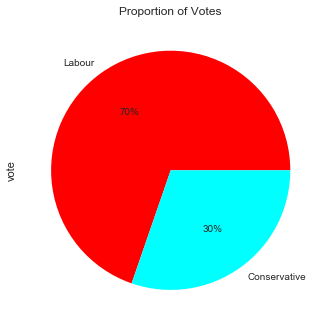

In [3978]:
colors = ['red','cyan']
df.vote.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Votes')

Text(0.5, 1.0, 'Proportion of Gender')

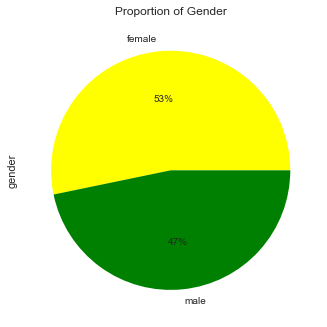

In [3979]:
colors = ['yellow','green']
df.gender.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Gender')

Text(13.123203125000003, 0.5, 'Count of Votes')

<Figure size 864x576 with 0 Axes>

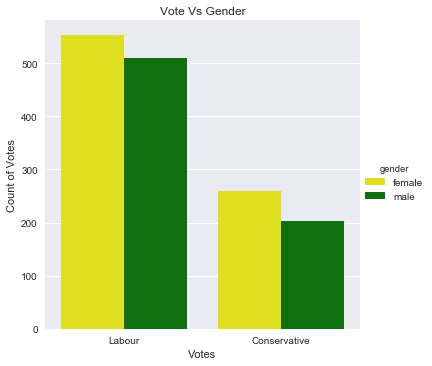

In [3980]:
plt.figure(figsize=(12,8))
ax = sns.catplot(x="vote", hue="gender", kind="count", data=df, palette = colors)
plt.title('Vote Vs Gender')
plt.xlabel('Votes')
plt.ylabel('Count of Votes')

Text(0.5, 1.0, 'Proportion of Age Group')

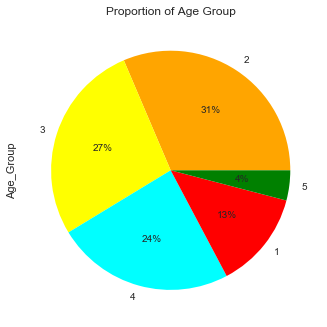

In [3981]:
colors = ['orange','yellow','cyan','red','green']
df.Age_Group.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Proportion of Age Group')

In [3982]:
df[df.vote == "Labour"].age.mean()

53.01411100658514

In [3983]:
df[df.vote == "Conservative"].age.mean()

56.87012987012987

In [3984]:
df.economic_cond_national.value_counts(normalize=True)

3    0.398033
4    0.355410
2    0.168525
5    0.053770
1    0.024262
Name: economic_cond_national, dtype: float64

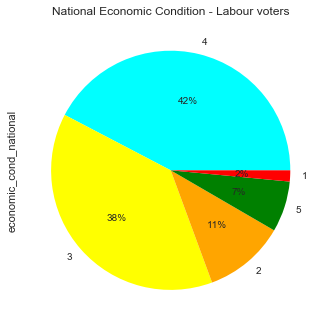

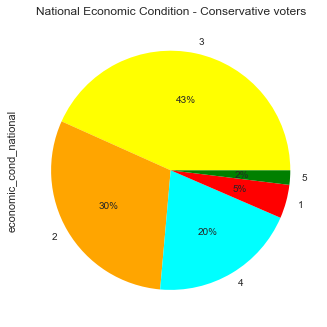

In [3985]:
#colors = [1'red',2'orange',3'yellow',4'cyan',5'green'] #1,2,3,4,5
colors = ['cyan','yellow','orange','green','red']
plt.figure(0)
#df.economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
df[df.vote == "Labour"].economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Labour voters')
colors = ['yellow','orange','cyan','red','green']
plt.figure(1)
df[df.vote == "Conservative"].economic_cond_national.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('National Economic Condition - Conservative voters')
plt.show()


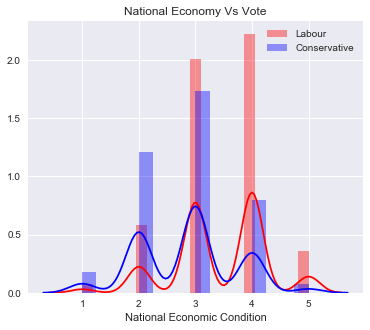

In [3986]:
f, ax = plt.subplots(figsize = (6,5))
sns.distplot(df[df.vote=='Labour'].economic_cond_national, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].economic_cond_national, label = 'Conservative', color = 'blue')
ax.set_title("National Economy Vs Vote",fontsize=12)
ax.set_xlabel('National Economic Condition')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

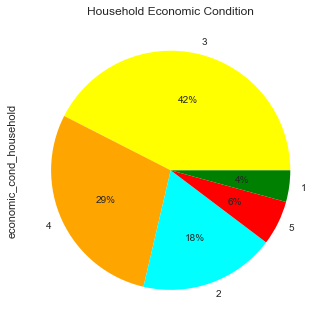

In [3987]:
df.economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition')
plt.show()

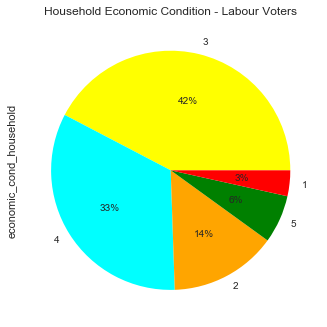

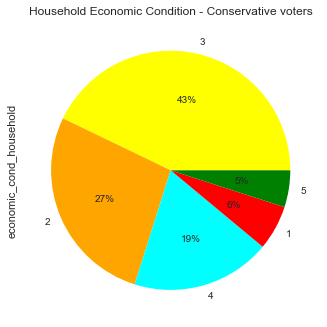

In [3988]:
colors = ['yellow','cyan','orange','green', 'red']
plt.figure(0)
df[df.vote == "Labour"].economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Labour Voters')
plt.figure(1)
colors = ['yellow','orange','cyan','red','green']
df[df.vote == "Conservative"].economic_cond_household.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Household Economic Condition - Conservative voters')
plt.show()

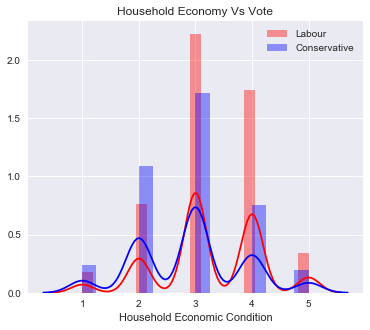

In [3989]:
f, ax = plt.subplots(figsize = (6,5))
sns.distplot(df[df.vote=='Labour'].economic_cond_household, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].economic_cond_household, label = 'Conservative', color = 'blue')
ax.set_title("Household Economy Vs Vote",fontsize=12)
ax.set_xlabel('Household Economic Condition')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

In [3990]:
df[df.vote
   =='Conservative'].Blair.value_counts(normalize=True)

2    0.523810
4    0.339827
1    0.127706
5    0.006494
3    0.002165
Name: Blair, dtype: float64

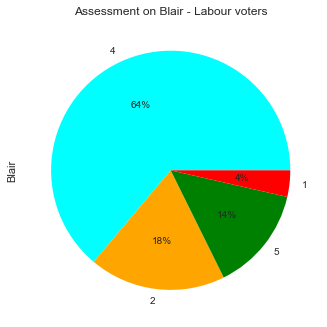

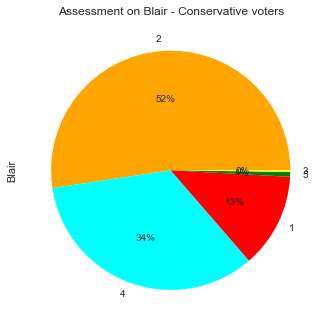

In [3991]:
colors = ['cyan','orange','green','red','yellow']
plt.figure(0)
df[df.vote == "Labour"].Blair.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Assessment on Blair - Labour voters')
plt.figure(1)
colors = ['orange','cyan','red','green','yellow']
df[df.vote == "Conservative"].Blair.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Assessment on Blair - Conservative voters')
plt.show()

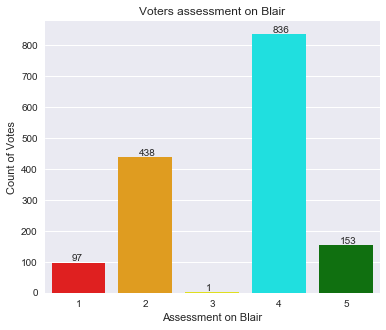

In [3992]:
colors = ['red','orange','yellow','cyan','green']
#ax = sns.catplot(x="Blair",kind="count", data=df, palette = colors, label = (1,2,3,4,5))
plt.figure(figsize=(6,5))
ax = sns.countplot(df.Blair,palette = colors)
plt.title('Voters assessment on Blair')
plt.xlabel('Assessment on Blair')
plt.ylabel('Count of Votes')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()+5))

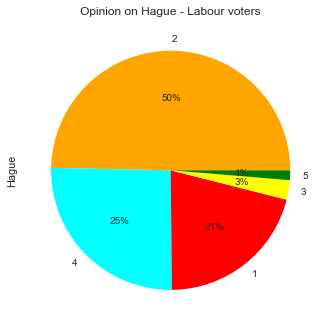

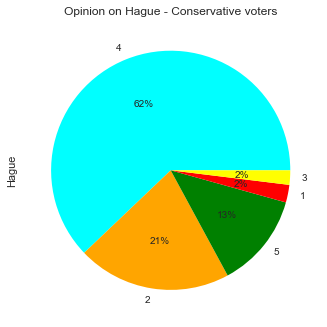

In [3993]:
colors = ['orange','cyan','red','yellow','green']
plt.figure(0)
df[df.vote == "Labour"].Hague.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Opinion on Hague - Labour voters')
plt.figure(1)
colors = ['cyan','orange','green','red','yellow']
df[df.vote == "Conservative"].Hague.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title('Opinion on Hague - Conservative voters')
plt.show()

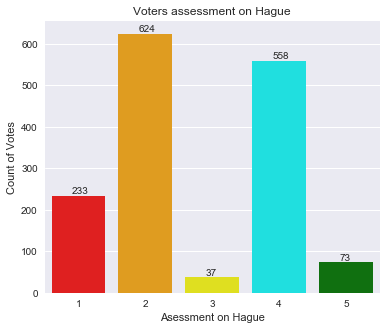

In [3994]:
colors = ['red','orange','yellow','cyan','green']
#ax = sns.catplot(x="Blair",kind="count", data=df, palette = colors, label = (1,2,3,4,5))
plt.figure(figsize=(6,5))
ax = sns.countplot(df.Hague,palette = colors)
plt.title('Voters assessment on Hague')
plt.xlabel('Asessment on Hague')
plt.ylabel('Count of Votes')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()+5))

In [3995]:
df.Hague.value_counts(normalize=True)

2    0.409180
4    0.365902
1    0.152787
5    0.047869
3    0.024262
Name: Hague, dtype: float64

No handles with labels found to put in legend.


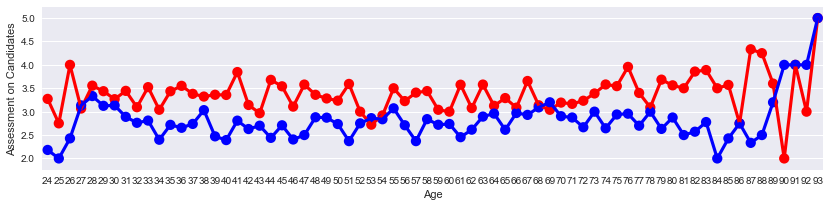

In [3996]:
f, ax = plt.subplots(figsize = (14,3))
ax = sns.pointplot(x='age', y="Blair", data=df, ci = None, color = 'red', label = 'Blair')
#sns.lineplot(data=df.age, ci = None)
ax=sns.pointplot(x="age", y="Hague", data=df, ci = None, color = 'blue', label = 'Hague')
ax.set_xlabel('Age')
ax.set_ylabel('Assessment on Candidates')
ax.legend()

plt.show()

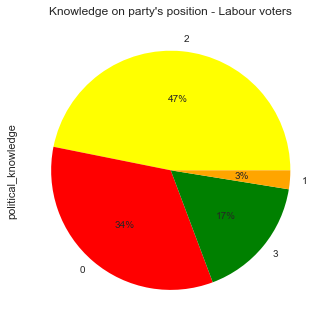

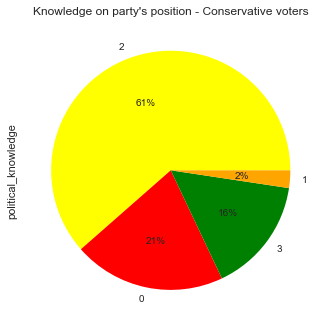

In [3997]:
colors = ['yellow','red','green','orange']
plt.figure(0)
df[df.vote == "Labour"].political_knowledge.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title("Knowledge on party's position - Labour voters")
plt.figure(1)
df[df.vote == "Conservative"].political_knowledge.value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%', colors = colors)
plt.title("Knowledge on party's position - Conservative voters")
plt.show()

In [3998]:
df.political_knowledge.value_counts(normalize=True)

2    0.512787
0    0.298361
3    0.163934
1    0.024918
Name: political_knowledge, dtype: float64

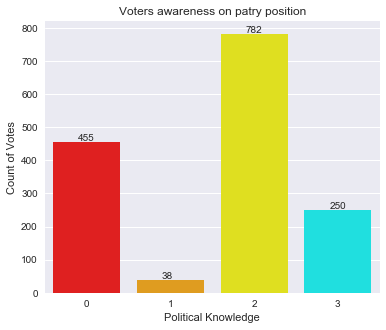

In [3999]:
colors = ['red','orange','yellow','cyan','green']
#ax = sns.catplot(x="Blair",kind="count", data=df, palette = colors, label = (1,2,3,4,5))
plt.figure(figsize=(6,5))
ax = sns.countplot(df.political_knowledge,palette = colors)
plt.title('Voters awareness on patry position')
plt.xlabel('Political Knowledge')
plt.ylabel('Count of Votes')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()+5))

Text(27.674244791666673, 0.5, 'Eurosceptism')

<Figure size 864x576 with 0 Axes>

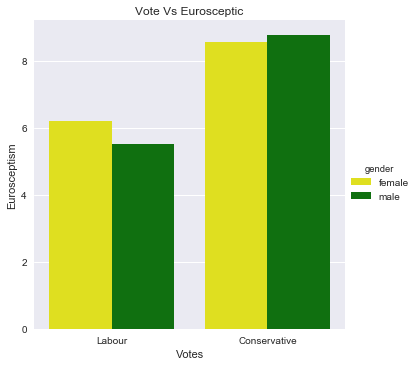

In [4000]:
colors = ['yellow','green']
plt.figure(figsize=(12,8))
ax = sns.catplot(x="vote", y="Europe", hue = 'gender', kind="bar", data=df, palette = colors , ci=None)
plt.title('Vote Vs Eurosceptic')
plt.xlabel('Votes')
plt.ylabel('Eurosceptism')

Text(26.62166666666667, 0.5, 'Eurosceptism')

<Figure size 864x576 with 0 Axes>

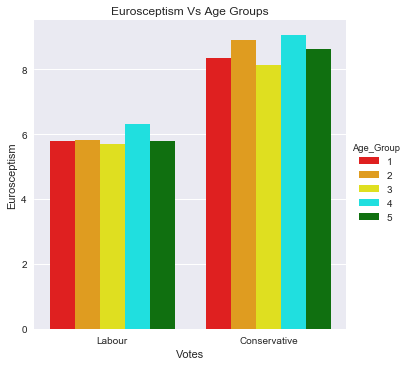

In [4001]:
colors = ['red','orange','yellow','cyan','green']
plt.figure(figsize=(12,8))
ax = sns.catplot(x="vote", y="Europe", hue = 'Age_Group', kind="bar", data=df, palette = colors, ci=None)
plt.title('Eurosceptism Vs Age Groups')
plt.xlabel('Votes')
plt.ylabel('Eurosceptism')

Text(25.501132089120375, 0.5, 'Eurosceptism')

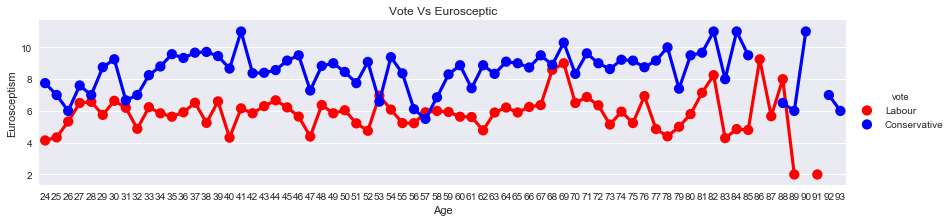

In [4002]:
sns.catplot(x="age", y="Europe", hue = 'vote', kind="point", data=df, ci = None, palette = ['red','blue'], height = 3, aspect = 4 )
plt.title('Vote Vs Eurosceptic')
plt.xlabel('Age')
plt.ylabel('Eurosceptism')

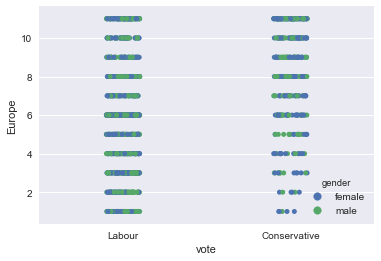

In [4003]:
plt.figure(figsize=(6,4))
sns.stripplot(df.vote, df.Europe, hue = df.gender, jitter=True) 
plt.show()

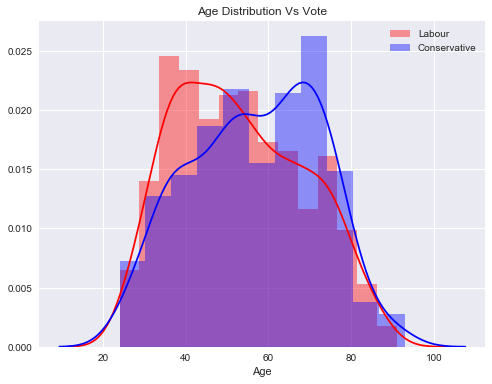

In [4004]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(df[df.vote=='Labour'].age, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].age, label = 'Conservative', color = 'blue')
ax.set_title("Age Distribution Vs Vote",fontsize=12)
ax.set_xlabel('Age')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

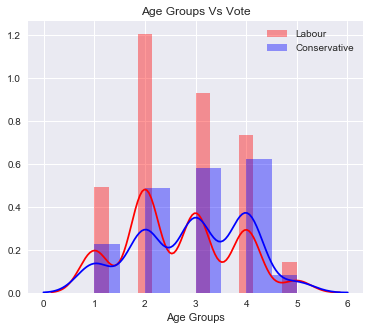

In [4005]:
f, ax = plt.subplots(figsize = (6,5))
sns.distplot(df[df.vote=='Labour'].Age_Group, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].Age_Group, label = 'Conservative', color = 'blue')
ax.set_title("Age Groups Vs Vote",fontsize=12)
ax.set_xlabel('Age Groups')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

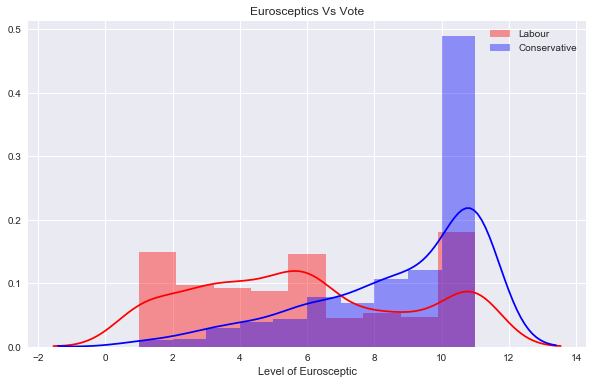

In [4006]:
f, ax = plt.subplots(figsize = (10,6))
sns.distplot(df[df.vote=='Labour'].Europe, label = 'Labour', color = 'red')
sns.distplot(df[df.vote=='Conservative'].Europe, label = 'Conservative', color = 'blue')
ax.set_title("Eurosceptics Vs Vote",fontsize=12)
ax.set_xlabel('Level of Eurosceptic')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

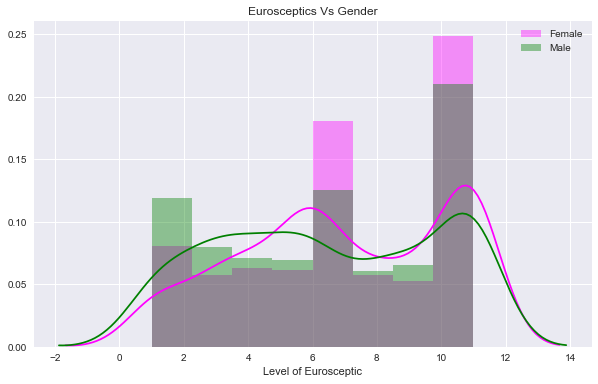

In [4007]:
f, ax = plt.subplots(figsize = (10,6))
sns.distplot(df[df.gender=='female'].Europe, label = 'Female', color = 'magenta')
sns.distplot(df[df.gender=='male'].Europe, label = 'Male', color = 'green')
ax.set_title("Eurosceptics Vs Gender",fontsize=12)
ax.set_xlabel('Level of Eurosceptic')
ax.legend(ncol = 1)
sns.despine(left = True, bottom = True)
plt.show()

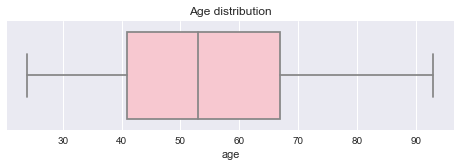

In [4008]:
plt.figure(figsize=(8,2))
plt.title('Age distribution',fontsize=12)
sns.boxplot(df['age'] , orient = "h", color = 'pink') 

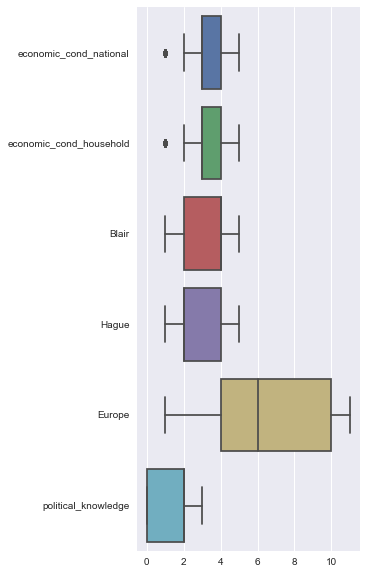

In [4009]:
f, ax = plt.subplots(figsize = (4,10))
sns.set_color_codes('pastel')
sns.boxplot(data=df[['economic_cond_national','economic_cond_household','Blair','Hague','Europe','political_knowledge']] ,
                orient = "h")

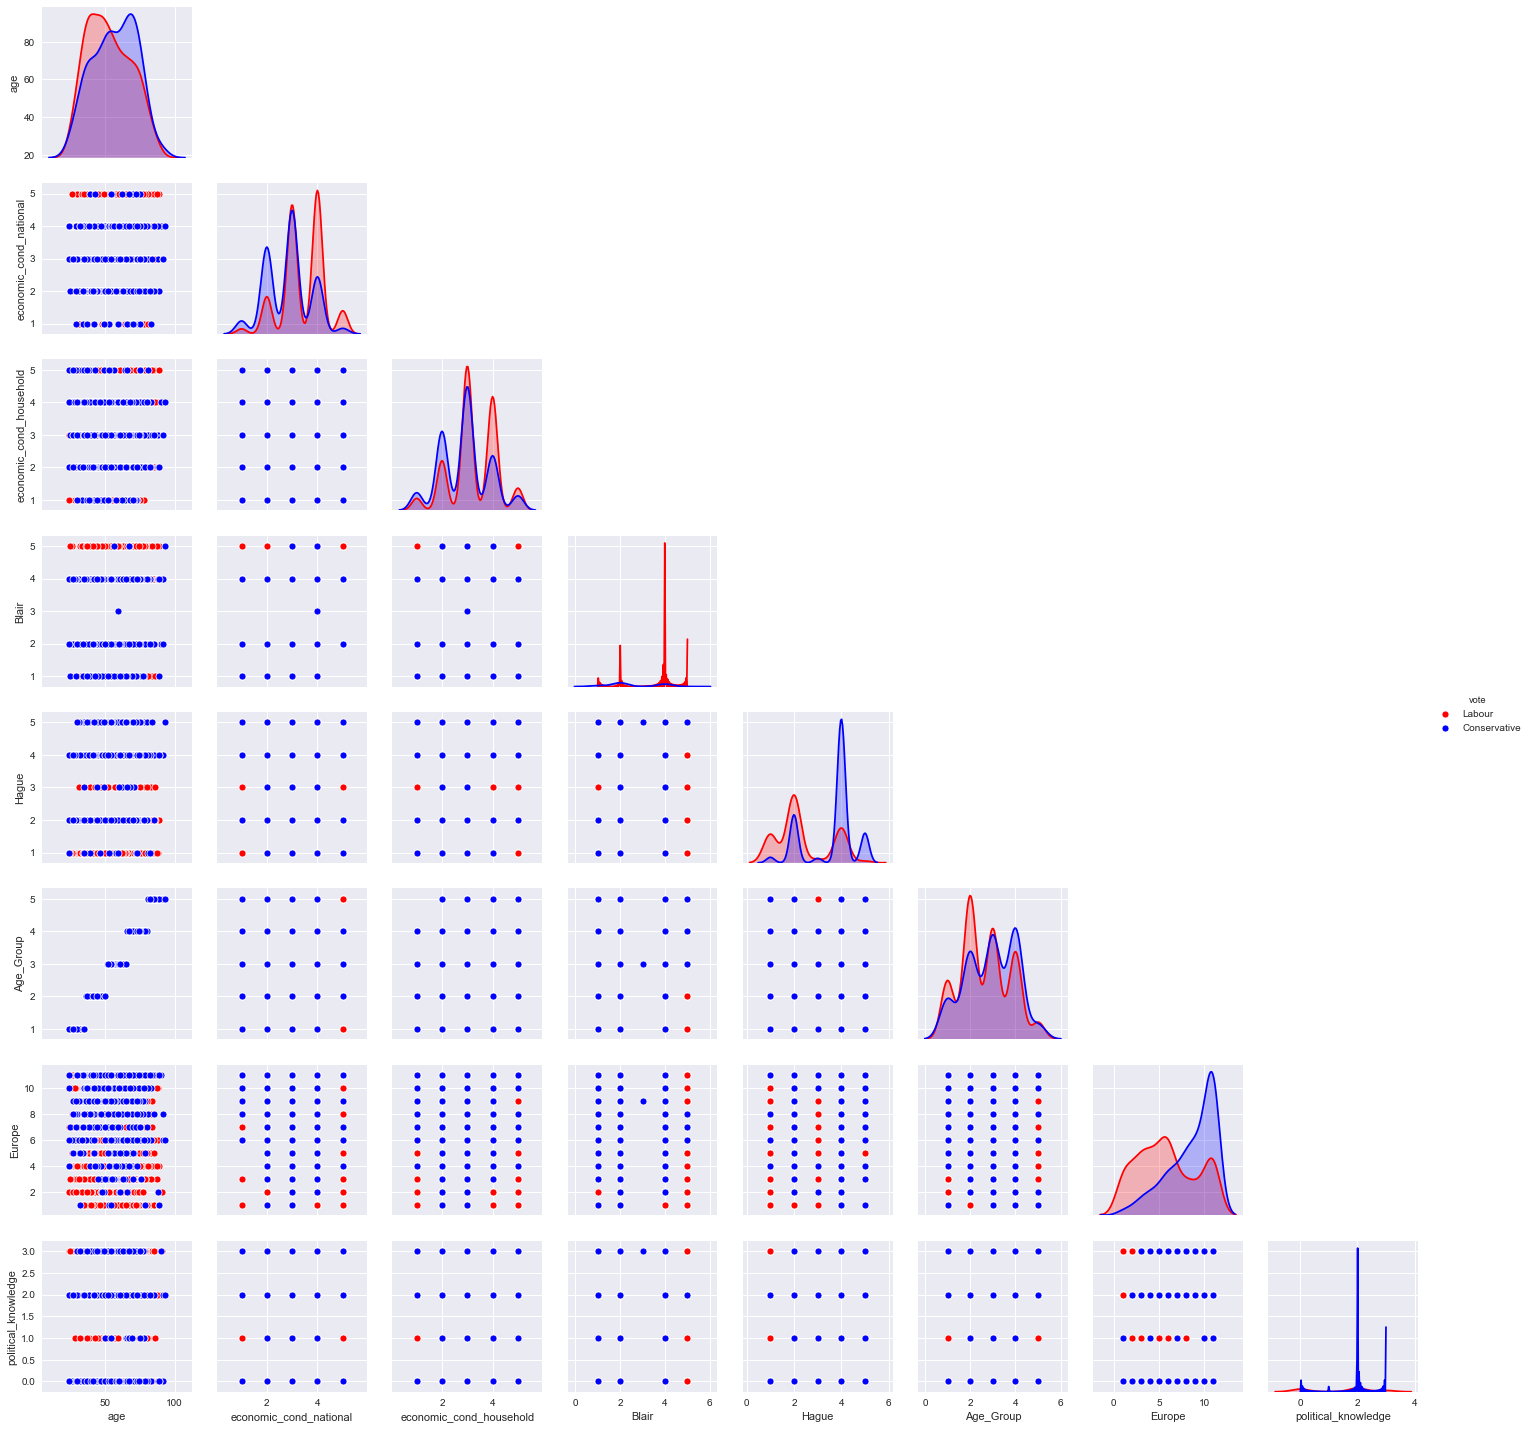

In [4010]:
ax = sns.pairplot(df,hue='vote',palette=['red','blue'], diag_kind='kde')
for i, j in zip(*np.triu_indices_from(ax.axes, 1)):
    ax.axes[i, j].set_visible(False)

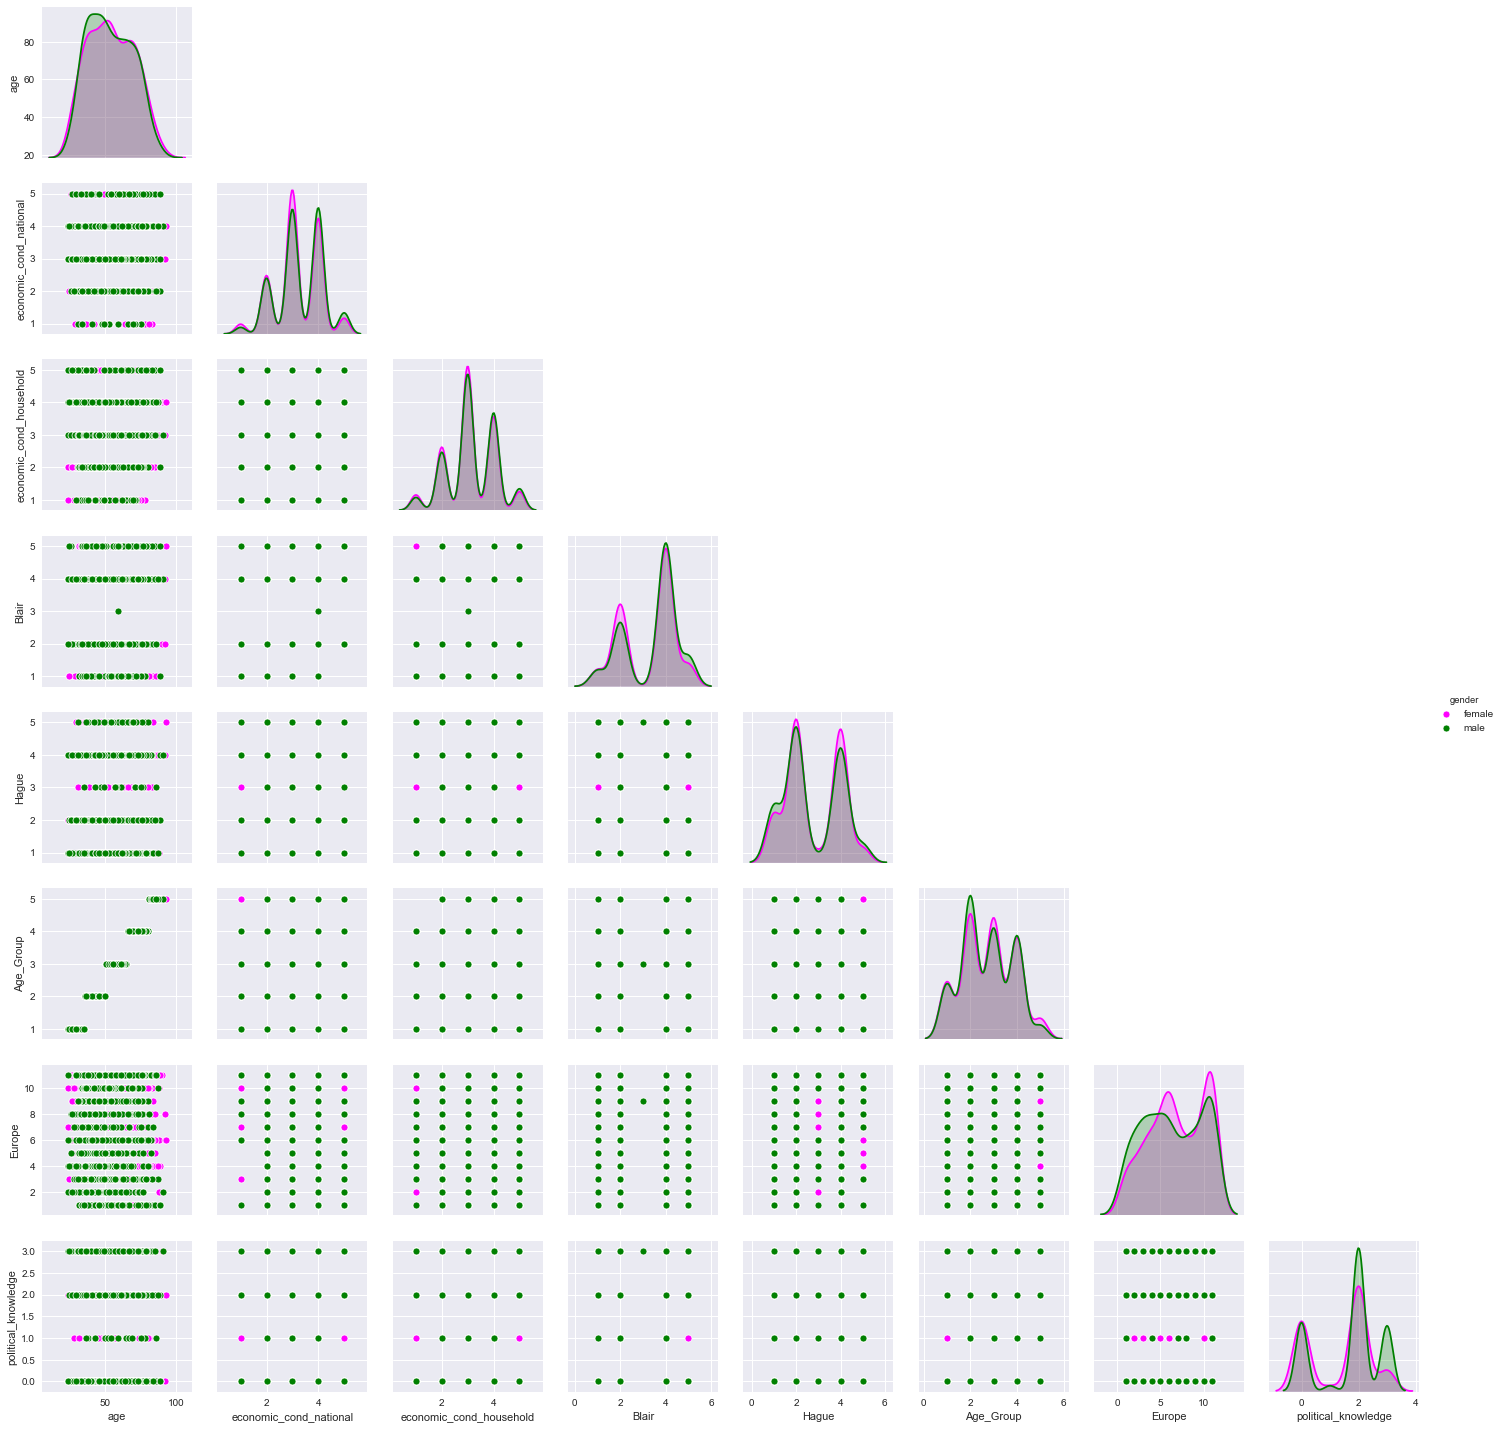

In [4011]:
ax = sns.pairplot(df,hue='gender', palette=['magenta','green'], diag_kind='kde')
for i, j in zip(*np.triu_indices_from(ax.axes, 1)):
    ax.axes[i, j].set_visible(False)

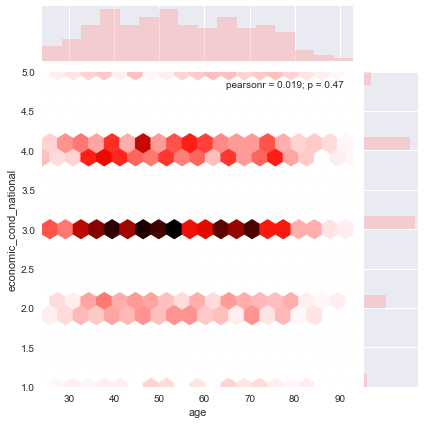

In [4012]:
#plt.figure(figsize=(2,4))
sns.jointplot(df.age, df.economic_cond_national, color = 'r', kind='hex').annotate(stats.pearsonr)

<Figure size 288x288 with 0 Axes>

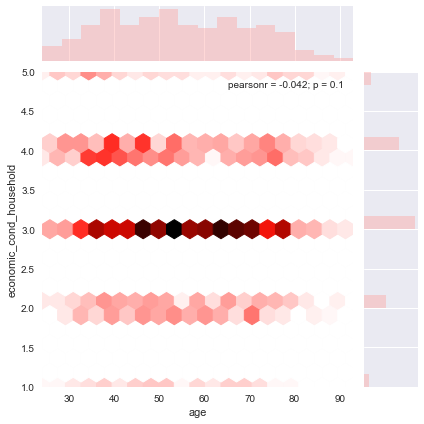

In [4013]:
plt.figure(figsize=(4,4))
sns.jointplot(df.age, df.economic_cond_household, color = 'r', kind='hex').annotate(stats.pearsonr)

<Figure size 288x288 with 0 Axes>

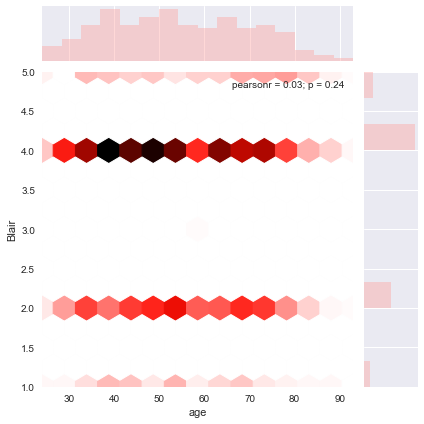

In [4014]:
plt.figure(figsize=(4,4))
sns.jointplot(df.age, df.Blair, color = 'r', kind='hex').annotate(stats.pearsonr)

<Figure size 288x288 with 0 Axes>

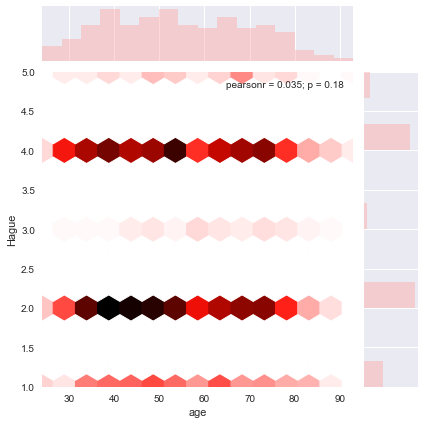

In [4015]:
plt.figure(figsize=(4,4))
sns.jointplot(df.age, df.Hague, color = 'r', kind='hex').annotate(stats.pearsonr)

<Figure size 288x288 with 0 Axes>

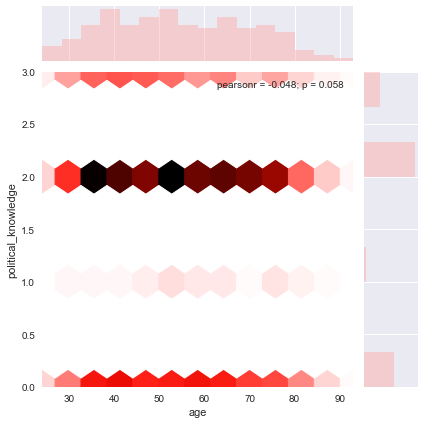

In [4016]:
plt.figure(figsize=(4,4))
sns.jointplot(df.age, df.political_knowledge, color = 'r', kind='hex').annotate(stats.pearsonr)

In [4017]:
#df.gender = df.gender.astype('category')
#df.gender = df.gender.cat.codes
df.vote = df.vote.astype('category')
df.vote = df.vote.cat.codes
df.head()
# Female 0, Male 1
# Conservative 0, Labour 1

,vote,age,economic_cond_national,economic_cond_household,Blair,Hague,Age_Group,Europe,political_knowledge,gender
0,1,43,3,3,4,1,2,2,2,female
1,1,36,4,4,4,4,2,5,2,male
2,1,35,4,4,5,2,1,3,2,male
3,1,24,4,2,2,1,1,4,0,female
4,1,41,2,2,1,1,2,6,2,male


<Figure size 288x288 with 0 Axes>

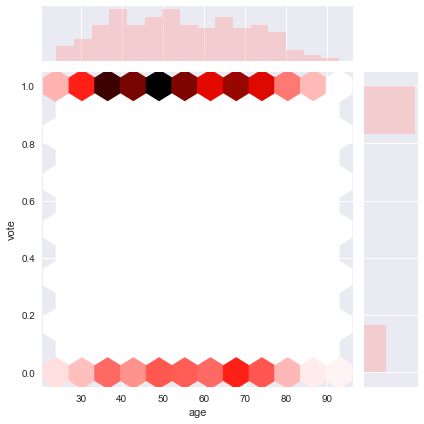

In [4018]:
plt.figure(figsize=(4,4))
sns.jointplot(df.age, df.vote, color = 'r', kind='hex')

In [4019]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
vote                       1525 non-null int8
age                        1525 non-null int64
economic_cond_national     1525 non-null object
economic_cond_household    1525 non-null object
Blair                      1525 non-null object
Hague                      1525 non-null object
Age_Group                  1525 non-null object
Europe                     1525 non-null object
political_knowledge        1525 non-null object
gender                     1525 non-null object
dtypes: int64(1), int8(1), object(8)
memory usage: 108.8+ KB


In [4020]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Age_Group', 'Europe', 'political_knowledge', 'gender']
['vote', 'age']


In [4021]:
df = pd.get_dummies(df, columns = {'economic_cond_national', 'economic_cond_household', 'Blair', 'Hague', 'Age_Group', 'Europe', 'political_knowledge'} ,drop_first=False)

In [4022]:
df = pd.get_dummies(df,columns = {'gender'}, drop_first=True)

In [4023]:
df = df.drop('age', axis = 1)# Dropping age 

In [4024]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 42 columns):
vote                         1525 non-null int8
Age_Group_1                  1525 non-null uint8
Age_Group_2                  1525 non-null uint8
Age_Group_3                  1525 non-null uint8
Age_Group_4                  1525 non-null uint8
Age_Group_5                  1525 non-null uint8
economic_cond_national_1     1525 non-null uint8
economic_cond_national_2     1525 non-null uint8
economic_cond_national_3     1525 non-null uint8
economic_cond_national_4     1525 non-null uint8
economic_cond_national_5     1525 non-null uint8
Europe_1                     1525 non-null uint8
Europe_2                     1525 non-null uint8
Europe_3                     1525 non-null uint8
Europe_4                     1525 non-null uint8
Europe_5                     1525 non-null uint8
Europe_6                     1525 non-null uint8
Europe_7                     1525 non-null uint8
Europe_8    

## Train - Test Split

In [4025]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)
# Copy target into the y dataframe.  
y = df['vote']

In [4026]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.30,
                                                    random_state=27)

## Logistic Regression Model

In [4027]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)

LogisticRegression()

In [4028]:
ytrain_predict = logit_model.predict(X_train)
ytest_predict = logit_model.predict(X_test)

In [4029]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(10)

,0,1
240,0.168772,0.831228
274,0.083345,0.916655
249,0.872284,0.127716
365,0.715204,0.284796
70,0.002184,0.997816
402,0.025553,0.974447
50,0.011413,0.988587
227,0.050440,0.949560
327,0.364915,0.635085
306,0.014439,0.985561


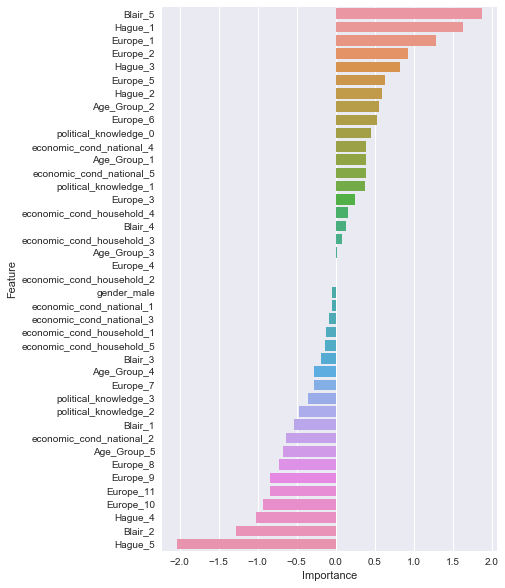

In [4030]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model.coef_[0]})
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(6,10))
sns.barplot(y='Feature', x='Importance', data=feature_rank)

In [4031]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [4032]:
def performance_matrices(model, X_data, y_data, y_predicted):
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of minority class
    precision=round(met_df.loc["0"][0],2)
    recall=round(met_df.loc["0"][1],2)
    f1=round(met_df.loc["0"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [4033]:
def performance_matrices_maj(model, X_data, y_data, y_predicted): #will be used for final comparison
    accuracy = round(model.score(X_data,y_data),2)
    metrics=classification_report(y_data, y_predicted,output_dict=True)
    met_df=pd.DataFrame(metrics).transpose()
    # Keeping the performance matrices of MAJORITY class
    precision=round(met_df.loc["1"][0],2)
    recall=round(met_df.loc["1"][1],2)
    f1=round(met_df.loc["1"][2],2)
    return (met_df, accuracy,precision,recall,f1);

In [4034]:
logit_train_met1,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model, X_train, y_train, ytrain_predict)
logit_train_met_maj1,logit_train_accu_maj, logit_train_precision_maj, logit_train_recall_maj, logit_train_f1_maj = performance_matrices_maj(logit_model, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu)
print ('logit_train_precision ',logit_train_precision)
print ('logit_train_recall ',logit_train_recall)
print ('logit_train_f1 ',logit_train_f1)

logit_train_accu  0.84
logit_train_precision  0.77
logit_train_recall  0.7
logit_train_f1  0.73


In [4037]:
logit_train_met1

,precision,recall,f1-score,support
0,0.770270,0.699387,0.733119,326.000000
1,0.872892,0.908232,0.890212,741.000000
accuracy,0.844424,0.844424,0.844424,0.844424
macro avg,0.821581,0.803809,0.811665,1067.000000
weighted avg,0.841538,0.844424,0.842215,1067.000000


In [4038]:
def draw_cm(actual, predicted, title):
    cm = confusion_matrix(actual, predicted, [0,1])
    plt.subplots(figsize=(4,3))
    ax = sns.heatmap(cm, cmap = 'Paired', annot=True, fmt='.0f',annot_kws={"fontsize":12},
              xticklabels = ["Conservative", "Labour"],
              yticklabels = ["Conservative", "Labour"],
                    cbar = False)
    bottom, top = ax.get_ylim()
    ax.set_ylim (bottom + 0.5, top - 0.5)
    plt.yticks(rotation=0)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(title)
    plt.show()

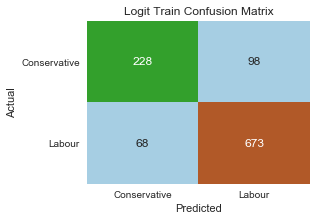

In [4039]:
draw_cm(y_train,ytrain_predict,"Logit Train Confusion Matrix")

In [4048]:
def draw_auc_roc(model, X_data, y_data, line_color, title):
    probs = model.predict_proba(X_data)
    probs = probs[:, 1]
    model_auc = roc_auc_score(y_data, probs)
    model_fpr, model_tpr, thresholds = roc_curve(y_data, probs)
    plt.figure(figsize=(6,4))
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(model_fpr, model_tpr, color = line_color, label = 'ROC Curve (AUC: %0.2f)'%model_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    # show the plot
    plt.show()
    return model_auc, model_fpr, model_tpr;

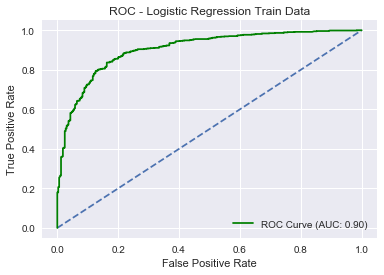

logit_train_auc 0.9042704685261997


In [4049]:
logit_train_auc1, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model, X_train, y_train, 'green', 'ROC - Logistic Regression Train Data')

print('logit_train_auc', logit_train_auc1)

In [3602]:
logit_test_met1,logit_test_accu, logit_test_precision, logit_test_recall, logit_test_f1 = performance_matrices(logit_model, X_test, y_test, ytest_predict)
logit_test_met_maj1,logit_test_accu_maj, logit_test_precision_maj, logit_test_recall_maj, logit_test_f1_maj = performance_matrices_maj(logit_model, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.82
logit_test_precision  0.7
logit_test_recall  0.68
logit_test_f1  0.69


In [3603]:
logit_test_met1

,precision,recall,f1-score,support
0,0.699248,0.683824,0.691450,136.000000
1,0.867692,0.875776,0.871716,322.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.783470,0.779800,0.781583,458.000000
weighted avg,0.817674,0.818777,0.818187,458.000000


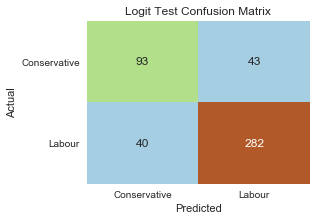

In [3604]:
draw_cm(y_test,ytest_predict,"Logit Test Confusion Matrix")

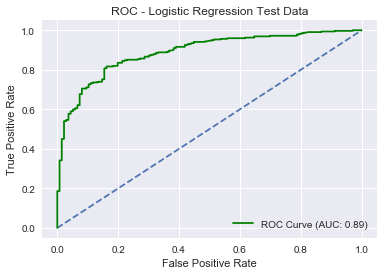

logit_test_auc 0.8888495615637558


In [3605]:
logit_test_auc1, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model, X_test, y_test, 'green', 'ROC - Logistic Regression Test Data')
print('logit_test_auc', logit_test_auc1)

## LDA Model

In [3606]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
LDA_model=clf.fit(X_train,y_train)
LDA_model

LinearDiscriminantAnalysis()

In [3607]:
ytrain_predict = LDA_model.predict(X_train)
ytest_predict = LDA_model.predict(X_test)

In [3608]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.689900,0.310100
1,0.015055,0.984945
2,0.580149,0.419851
3,0.463840,0.536160
4,0.015734,0.984266
5,0.025115,0.974885
6,0.269272,0.730728
7,0.004114,0.995886
8,0.721323,0.278677
9,0.525454,0.474546


In [3609]:
LDA_train_met1,LDA_train_accu,LDA_train_precision,LDA_train_recall,LDA_train_f1 = performance_matrices(LDA_model, X_train, y_train, ytrain_predict)
LDA_train_met_maj1,LDA_train_accu_maj,LDA_train_precision_maj,LDA_train_recall_maj,LDA_train_f1_maj = performance_matrices_maj(LDA_model, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu)
print ('LDA_train_precision ',LDA_train_precision)
print ('LDA_train_recall ',LDA_train_recall)
print ('LDA_train_f1 ',LDA_train_f1)

LDA_train_accu  0.85
LDA_train_precision  0.77
LDA_train_recall  0.72
LDA_train_f1  0.75


In [3610]:
LDA_train_met1

,precision,recall,f1-score,support
0,0.768730,0.723926,0.745656,326.00000
1,0.881579,0.904184,0.892738,741.00000
accuracy,0.849110,0.849110,0.849110,0.84911
macro avg,0.825154,0.814055,0.819197,1067.00000
weighted avg,0.847100,0.849110,0.847800,1067.00000


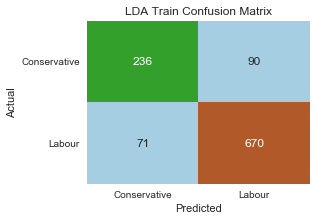

In [3611]:
draw_cm(y_train,ytrain_predict,"LDA Train Confusion Matrix")

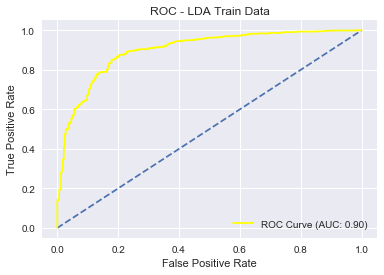

LDA_train_auc 0.8994808872109487


In [3612]:
LDA_train_auc1, LDA_train_fpr, LDA_train_tpr = draw_auc_roc(LDA_model, X_train, y_train, 'yellow', 'ROC - LDA Train Data')
print('LDA_train_auc', LDA_train_auc1)

In [3613]:
LDA_test_met1,LDA_test_accu,LDA_test_precision,LDA_test_recall,LDA_test_f1 = performance_matrices(LDA_model, X_test, y_test, ytest_predict)
LDA_test_met_maj1,LDA_test_accu_maj,LDA_test_precision_maj,LDA_test_recall_maj,LDA_test_f1_maj = performance_matrices_maj(LDA_model, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu)
print ('LDA_test_precision ',LDA_test_precision)
print ('LDA_test_recall ',LDA_test_recall)
print ('LDA_test_f1 ',LDA_test_f1)

LDA_test_accu  0.82
LDA_test_precision  0.68
LDA_test_recall  0.71
LDA_test_f1  0.7


In [3614]:
LDA_test_met1

,precision,recall,f1-score,support
0,0.683099,0.713235,0.697842,136.000000
1,0.876582,0.860248,0.868339,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.779840,0.786742,0.783090,458.000000
weighted avg,0.819129,0.816594,0.817711,458.000000


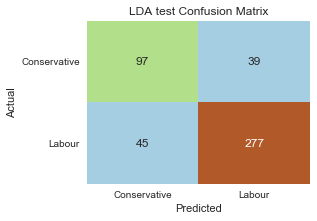

In [3615]:
draw_cm(y_test,ytest_predict,"LDA test Confusion Matrix")

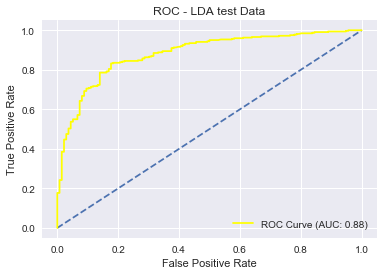

LDA_test_auc 0.882775392765802


In [3616]:
LDA_test_auc1, LDA_test_fpr, LDA_test_tpr = draw_auc_roc(LDA_model, X_test, y_test, 'yellow', 'ROC - LDA test Data')
print('LDA_test_auc', LDA_test_auc1)

## KNN Model

In [3617]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [3618]:
ytrain_predict = KNN_model.predict(X_train)
ytest_predict = KNN_model.predict(X_test)

In [3619]:
KNN_train_met1,KNN_train_accu,KNN_train_precision,KNN_train_recall,KNN_train_f1 = performance_matrices(KNN_model, X_train, y_train, ytrain_predict)
KNN_train_met_maj1,KNN_train_accu_maj,KNN_train_precision_maj,KNN_train_recall_maj,KNN_train_f1_maj = performance_matrices_maj(KNN_model, X_train, y_train, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu)
print ('KNN_train_precision ',KNN_train_precision)
print ('KNN_train_recall ',KNN_train_recall)
print ('KNN_train_f1 ',KNN_train_f1)

KNN_train_accu  0.86
KNN_train_precision  0.79
KNN_train_recall  0.73
KNN_train_f1  0.76


In [3620]:
KNN_train_met1

,precision,recall,f1-score,support
0,0.788779,0.733129,0.759936,326.000000
1,0.886126,0.913630,0.899668,741.000000
accuracy,0.858482,0.858482,0.858482,0.858482
macro avg,0.837452,0.823380,0.829802,1067.000000
weighted avg,0.856383,0.858482,0.856976,1067.000000


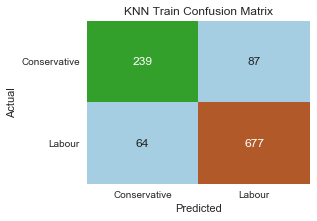

In [3621]:
draw_cm(y_train,ytrain_predict,"KNN Train Confusion Matrix")

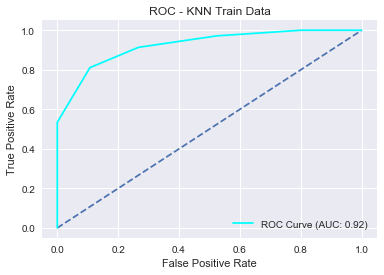

KNN_train_auc 0.9242173981437785


In [3622]:
KNN_train_auc1, KNN_train_fpr, KNN_train_tpr = draw_auc_roc(KNN_model, X_train, y_train, 'cyan', 'ROC - KNN Train Data')
print('KNN_train_auc', KNN_train_auc1)

In [3623]:
KNN_test_met1,KNN_test_accu,KNN_test_precision,KNN_test_recall,KNN_test_f1 = performance_matrices(KNN_model, X_test, y_test, ytest_predict)
KNN_test_met_maj1,KNN_test_accu_maj,KNN_test_precision_maj,KNN_test_recall_maj,KNN_test_f1_maj = performance_matrices_maj(KNN_model, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu)
print ('KNN_test_precision ',KNN_test_precision)
print ('KNN_test_recall ',KNN_test_recall)
print ('KNN_test_f1 ',KNN_test_f1)

KNN_test_accu  0.8
KNN_test_precision  0.69
KNN_test_recall  0.62
KNN_test_f1  0.65


In [3624]:
KNN_test_met1

,precision,recall,f1-score,support
0,0.685484,0.625000,0.653846,136.000000
1,0.847305,0.878882,0.862805,322.000000
accuracy,0.803493,0.803493,0.803493,0.803493
macro avg,0.766395,0.751941,0.758326,458.000000
weighted avg,0.799254,0.803493,0.800756,458.000000


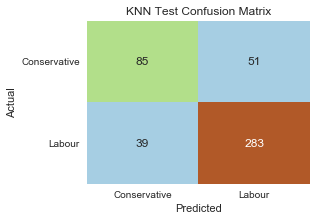

In [3625]:
draw_cm(y_test,ytest_predict,"KNN Test Confusion Matrix")

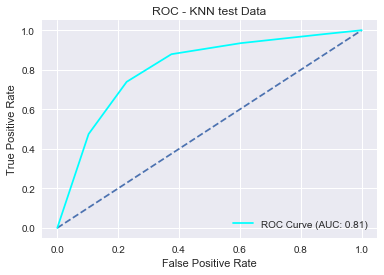

KNN_test_auc 0.8102735659481184


In [3626]:
KNN_test_auc1, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model, X_test, y_test, 'cyan', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc1)

## Naive Bayes Model

Choosing Multinomial Naive Bayes as the data is multinomial in nature

In [3932]:
from sklearn.naive_bayes import MultinomialNB
MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)

MultinomialNB()

In [3933]:
ytrain_predict = MNB_model.predict(X_train)
ytest_predict = MNB_model.predict(X_test)

In [3934]:
ytest_predict_prob=logit_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).sample(10)

,0,1
375,0.125571,0.874429
292,0.019906,0.980094
36,0.610214,0.389786
328,0.256084,0.743916
297,0.326327,0.673673
167,0.045202,0.954798
454,0.446690,0.553310
132,0.005887,0.994113
387,0.167483,0.832517
238,0.238519,0.761481


In [3629]:
MNB_train_met1,MNB_train_accu,MNB_train_precision,MNB_train_recall,MNB_train_f1 = performance_matrices(MNB_model, X_train, y_train, ytrain_predict)
MNB_train_met_maj1,MNB_train_accu_maj,MNB_train_precision_maj,MNB_train_recall_maj,MNB_train_f1_maj = performance_matrices_maj(MNB_model, X_train, y_train, ytrain_predict)
print ('MNB_train_accu ',MNB_train_accu)
print ('MNB_train_precision ',MNB_train_precision)
print ('MNB_train_recall ',MNB_train_recall)
print ('MNB_train_f1 ',MNB_train_f1)

MNB_train_accu  0.84
MNB_train_precision  0.74
MNB_train_recall  0.73
MNB_train_f1  0.73


In [3630]:
MNB_train_met1

,precision,recall,f1-score,support
0,0.740625,0.726994,0.733746,326.0000
1,0.880857,0.887989,0.884409,741.0000
accuracy,0.838800,0.838800,0.838800,0.8388
macro avg,0.810741,0.807492,0.809077,1067.0000
weighted avg,0.838012,0.838800,0.838377,1067.0000


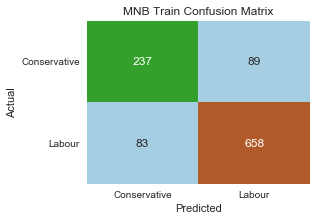

In [3631]:
draw_cm(y_train,ytrain_predict,"MNB Train Confusion Matrix")

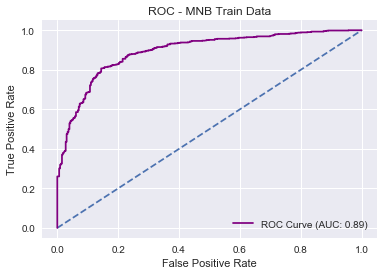

MNB_train_auc 0.8934287109940968


In [3632]:
MNB_train_auc1, MNB_train_fpr, MNB_train_tpr = draw_auc_roc(MNB_model, X_train, y_train, 'purple', 'ROC - MNB Train Data')
print('MNB_train_auc', MNB_train_auc1)

In [3633]:
MNB_test_met1,MNB_test_accu,MNB_test_precision,MNB_test_recall,MNB_test_f1 = performance_matrices(MNB_model, X_test, y_test, ytest_predict)
MNB_test_met_maj1,MNB_test_accu_maj,MNB_test_precision_maj,MNB_test_recall_maj,MNB_test_f1_maj = performance_matrices_maj(MNB_model, X_test, y_test, ytest_predict)
print ('MNB_test_accu ',MNB_test_accu)
print ('MNB_test_precision ',MNB_test_precision)
print ('MNB_test_recall ',MNB_test_recall)
print ('MNB_test_f1 ',MNB_test_f1)

MNB_test_accu  0.83
MNB_test_precision  0.71
MNB_test_recall  0.74
MNB_test_f1  0.72


In [3634]:
MNB_test_met1

,precision,recall,f1-score,support
0,0.706294,0.742647,0.724014,136.000000
1,0.888889,0.869565,0.879121,322.000000
accuracy,0.831878,0.831878,0.831878,0.831878
macro avg,0.797591,0.806106,0.801568,458.000000
weighted avg,0.834668,0.831878,0.833063,458.000000


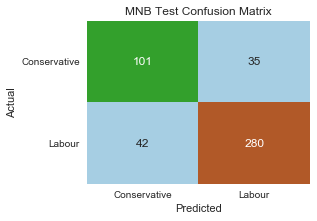

In [3635]:
draw_cm(y_test,ytest_predict,"MNB Test Confusion Matrix")

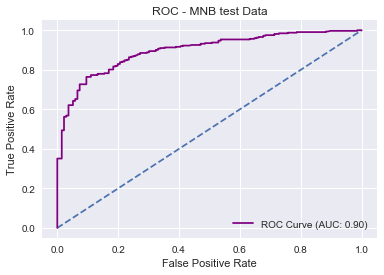

MNB_test_auc 0.8970474059188892


In [3636]:
MNB_test_auc1, MNB_test_fpr, MNB_test_tpr = draw_auc_roc(MNB_model, X_test, y_test, 'purple', 'ROC - MNB test Data')
print('MNB_test_auc', MNB_test_auc1)

## SVM Model

In [3637]:
from sklearn import svm

SVM_model= svm.SVC(probability=True,random_state=1)
SVM_model.fit(X_train, y_train)

SVC(probability=True, random_state=1)

In [3638]:
ytrain_predict = SVM_model.predict(X_train)
ytest_predict = SVM_model.predict(X_test)

In [3639]:
SVM_train_met1,SVM_train_accu,SVM_train_precision,SVM_train_recall,SVM_train_f1 = performance_matrices(SVM_model, X_train, y_train, ytrain_predict)
SVM_train_met_maj1,SVM_train_accu_maj,SVM_train_precision_maj,SVM_train_recall_maj,SVM_train_f1_maj = performance_matrices_maj(SVM_model, X_train, y_train, ytrain_predict)
print ('SVM_train_accu ',SVM_train_accu)
print ('SVM_train_precision ',SVM_train_precision)
print ('SVM_train_recall ',SVM_train_recall)
print ('SVM_train_f1 ',SVM_train_f1)

SVM_train_accu  0.9
SVM_train_precision  0.87
SVM_train_recall  0.79
SVM_train_f1  0.83


In [3640]:
SVM_train_met1

,precision,recall,f1-score,support
0,0.870748,0.785276,0.825806,326.000000
1,0.909444,0.948718,0.928666,741.000000
accuracy,0.898782,0.898782,0.898782,0.898782
macro avg,0.890096,0.866997,0.877236,1067.000000
weighted avg,0.897621,0.898782,0.897239,1067.000000


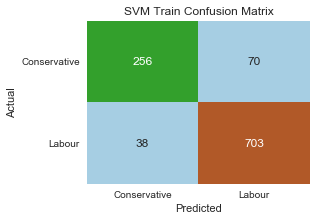

In [3641]:
draw_cm(y_train,ytrain_predict,"SVM Train Confusion Matrix")

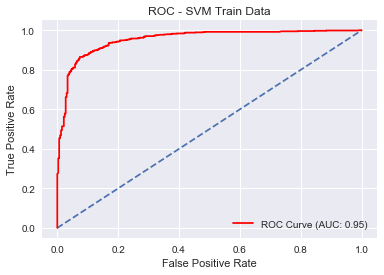

SVM_train_auc 0.9534785524452944


In [3642]:
SVM_train_auc1, SVM_train_fpr, SVM_train_tpr = draw_auc_roc(SVM_model, X_train, y_train, 'red', 'ROC - SVM Train Data')
print('SVM_train_auc', SVM_train_auc1)

In [3643]:
SVM_test_met1,SVM_test_accu,SVM_test_precision,SVM_test_recall,SVM_test_f1 = performance_matrices(SVM_model, X_test, y_test, ytest_predict)
SVM_test_met_maj1,SVM_test_accu_maj,SVM_test_precision_maj,SVM_test_recall_maj,SVM_test_f1_maj = performance_matrices_maj(SVM_model, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu)
print ('SVM_test_precision ',SVM_test_precision)
print ('SVM_test_recall ',SVM_test_recall)
print ('SVM_test_f1 ',SVM_test_f1)

SVM_test_accu  0.82
SVM_test_precision  0.71
SVM_test_recall  0.67
SVM_test_f1  0.69


In [3644]:
SVM_test_met1

,precision,recall,f1-score,support
0,0.710938,0.669118,0.689394,136.000000
1,0.863636,0.885093,0.874233,322.000000
accuracy,0.820961,0.820961,0.820961,0.820961
macro avg,0.787287,0.777105,0.781814,458.000000
weighted avg,0.818293,0.820961,0.819346,458.000000


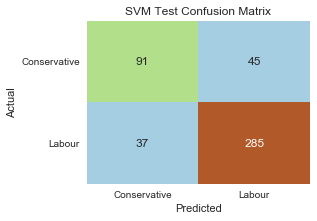

In [3645]:
draw_cm(y_test,ytest_predict,"SVM Test Confusion Matrix")

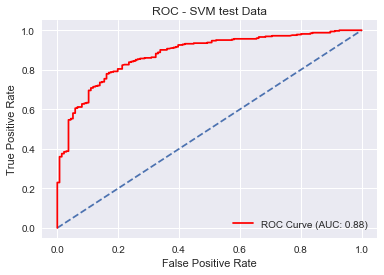

SVM_test_auc 0.878642217756668


In [3646]:
SVM_test_auc1, SVM_test_fpr, SVM_test_tpr = draw_auc_roc(SVM_model, X_test, y_test, 'red', 'ROC - SVM test Data')
print('SVM_test_auc', SVM_test_auc1)

## Model Tuning

In [3647]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 

In [3648]:
print('Before SMOTE: ',X_train.shape)
print('After SMOTE: ',X_train_res.shape)

Before SMOTE:  (1067, 41)
After SMOTE:  (1482, 41)


# Logit with SMOTE

In [3649]:
logit_res_model = LogisticRegression()
logit_res_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [3650]:
ytrain_predict = logit_res_model.predict(X_train_res)
ytest_predict = logit_res_model.predict(X_test)

In [3651]:
logit_test_met2,logit_res_test_accu,logit_res_test_precision,logit_res_test_recall,logit_res_test_f1 = performance_matrices(logit_res_model, X_test, y_test, ytest_predict)
print ('logit_res_test_accu ',logit_res_test_accu)
print ('logit_res_test_precision ',logit_res_test_precision)
print ('logit_res_test_recall ',logit_res_test_recall)
print ('logit_res_test_f1 ',logit_res_test_f1)

logit_res_test_accu  0.82
logit_res_test_precision  0.69
logit_res_test_recall  0.71
logit_res_test_f1  0.7


In [3652]:
logit_test_met2

,precision,recall,f1-score,support
0,0.685714,0.705882,0.695652,136.000000
1,0.874214,0.863354,0.868750,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.779964,0.784618,0.782201,458.000000
weighted avg,0.818240,0.816594,0.817350,458.000000


In [3653]:
logit_test_met1

,precision,recall,f1-score,support
0,0.699248,0.683824,0.691450,136.000000
1,0.867692,0.875776,0.871716,322.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.783470,0.779800,0.781583,458.000000
weighted avg,0.817674,0.818777,0.818187,458.000000


No significant improvement in test performance

## LDA with SMOTE

In [3654]:
LDA_res_model = LinearDiscriminantAnalysis()
LDA_res_model.fit(X_train_res,y_train_res)
#LDA_model

LinearDiscriminantAnalysis()

In [3655]:
ytrain_predict = LDA_res_model.predict(X_train_res)
ytest_predict = LDA_res_model.predict(X_test)

In [3656]:
LDA_test_met2,LDA_res_test_accu,LDA_res_test_precision,LDA_res_test_recall,LDA_res_test_f1 = performance_matrices(LDA_res_model, X_test, y_test, ytest_predict)
print ('LDA_res_test_accu ',LDA_res_test_accu)
print ('LDA_res_test_precision ',LDA_res_test_precision)
print ('LDA_res_test_recall ',LDA_res_test_recall)
print ('LDA_res_test_f1 ',LDA_res_test_f1)

LDA_res_test_accu  0.7
LDA_res_test_precision  0.0
LDA_res_test_recall  0.0
LDA_res_test_f1  0.0


In [3657]:
LDA_test_met2

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,136.000000
1,0.703057,1.000000,0.825641,322.000000
accuracy,0.703057,0.703057,0.703057,0.703057
macro avg,0.351528,0.500000,0.412821,458.000000
weighted avg,0.494289,0.703057,0.580473,458.000000


In [3658]:
LDA_test_met1

,precision,recall,f1-score,support
0,0.683099,0.713235,0.697842,136.000000
1,0.876582,0.860248,0.868339,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.779840,0.786742,0.783090,458.000000
weighted avg,0.819129,0.816594,0.817711,458.000000


No improvement in LDA model

## KNN with SMOTE

In [3659]:
KNN_res_model=KNeighborsClassifier()
KNN_res_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [3660]:
ytrain_predict = KNN_res_model.predict(X_train_res)
ytest_predict = KNN_res_model.predict(X_test)

In [3661]:
KNN_test_met2,KNN_res_test_accu,KNN_res_test_precision,KNN_res_test_recall,KNN_res_test_f1 = performance_matrices(KNN_res_model, X_test, y_test, ytest_predict)
print ('KNN_res_test_accu ',KNN_res_test_accu)
print ('KNN_res_test_precision ',KNN_res_test_precision)
print ('KNN_res_test_recall ',KNN_res_test_recall)
print ('KNN_res_test_f1 ',KNN_res_test_f1)

KNN_res_test_accu  0.81
KNN_res_test_precision  0.68
KNN_res_test_recall  0.65
KNN_res_test_f1  0.67


In [3662]:
KNN_test_met2

,precision,recall,f1-score,support
0,0.679389,0.654412,0.666667,136.000000
1,0.856269,0.869565,0.862866,322.000000
accuracy,0.805677,0.805677,0.805677,0.805677
macro avg,0.767829,0.761988,0.764766,458.000000
weighted avg,0.803746,0.805677,0.804606,458.000000


In [3663]:
KNN_test_met1

,precision,recall,f1-score,support
0,0.685484,0.625000,0.653846,136.000000
1,0.847305,0.878882,0.862805,322.000000
accuracy,0.803493,0.803493,0.803493,0.803493
macro avg,0.766395,0.751941,0.758326,458.000000
weighted avg,0.799254,0.803493,0.800756,458.000000


Test performance depreciated 

## SVM with SMOTE

In [3664]:
SVM_res_model= svm.SVC(probability=True,random_state=1)
SVM_res_model.fit(X_train_res, y_train_res)

SVC(probability=True, random_state=1)

In [3665]:
ytrain_predict = SVM_res_model.predict(X_train_res)
ytest_predict = SVM_res_model.predict(X_test)

In [3666]:
SVM_test_met2,SVM_res_test_accu,SVM_res_test_precision,SVM_res_test_recall,SVM_res_test_f1 = performance_matrices(SVM_res_model, X_test, y_test, ytest_predict)
print ('SVM_res_test_accu ',SVM_res_test_accu)
print ('SVM_res_test_precision ',SVM_res_test_precision)
print ('SVM_res_test_recall ',SVM_res_test_recall)
print ('SVM_res_test_f1 ',SVM_res_test_f1)

SVM_res_test_accu  0.7
SVM_res_test_precision  0.0
SVM_res_test_recall  0.0
SVM_res_test_f1  0.0


In [3667]:
SVM_test_met2

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,136.000000
1,0.703057,1.000000,0.825641,322.000000
accuracy,0.703057,0.703057,0.703057,0.703057
macro avg,0.351528,0.500000,0.412821,458.000000
weighted avg,0.494289,0.703057,0.580473,458.000000


In [3668]:
SVM_test_met1

,precision,recall,f1-score,support
0,0.710938,0.669118,0.689394,136.000000
1,0.863636,0.885093,0.874233,322.000000
accuracy,0.820961,0.820961,0.820961,0.820961
macro avg,0.787287,0.777105,0.781814,458.000000
weighted avg,0.818293,0.820961,0.819346,458.000000


Performance in test depreciated

## MNB with SMOTE

In [3669]:
MNB_res_model = MultinomialNB()
MNB_res_model.fit(X_train_res, y_train_res)

MultinomialNB()

In [3670]:
ytrain_predict = MNB_res_model.predict(X_train_res)
ytest_predict = MNB_res_model.predict(X_test)

In [3671]:
MNB_test_met2,MNB_res_test_accu,MNB_res_test_precision,MNB_res_test_recall,MNB_res_test_f1 = performance_matrices(MNB_res_model, X_test, y_test, ytest_predict)
print ('MNB_res_test_accu ',MNB_res_test_accu)
print ('MNB_res_test_precision ',MNB_res_test_precision)
print ('MNB_res_test_recall ',MNB_res_test_recall)
print ('MNB_res_test_f1 ',MNB_res_test_f1)

MNB_res_test_accu  0.75
MNB_res_test_precision  0.62
MNB_res_test_recall  0.45
MNB_res_test_f1  0.52


In [3672]:
MNB_test_met2

,precision,recall,f1-score,support
0,0.616162,0.448529,0.519149,136.000000
1,0.791086,0.881988,0.834068,322.000000
accuracy,0.753275,0.753275,0.753275,0.753275
macro avg,0.703624,0.665258,0.676608,458.000000
weighted avg,0.739144,0.753275,0.740555,458.000000


In [3673]:
MNB_test_met1

,precision,recall,f1-score,support
0,0.706294,0.742647,0.724014,136.000000
1,0.888889,0.869565,0.879121,322.000000
accuracy,0.831878,0.831878,0.831878,0.831878
macro avg,0.797591,0.806106,0.801568,458.000000
weighted avg,0.834668,0.831878,0.833063,458.000000


Test performace depreciated

No improvement in performance metrices could be found using SMOTE. SMOTE is effecttive only if the minority class is 1 to 2%, but here it is 30%

## Hyperparameter tuning using GridsearchCV

## Logistic Regression with GridSearchCV

In [3674]:
from sklearn.model_selection import GridSearchCV
class_weight = dict({0:2, 1:1})
clf = LogisticRegression(class_weight = class_weight)
grid_values = {'penalty': [ 'l2', 'none']
               ,'C':np.logspace(-3,3,20)
               ,'solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga' ]
              }
logit_model3 = GridSearchCV(clf, param_grid = grid_values,cv = 10)
#logit_model3 = LogisticRegression(C = 1.438449888287663, penalty = 'l2', solver = 'newton-cg', class_weight = class_weight)
logit_model3.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(class_weight={0: 2, 1: 1.5}),
             param_grid={'C': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [1]:
logit_model3.best_estimator_

NameError: name 'logit_model3' is not defined

In [3676]:
#feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : logit_model3.coef_[0]})
#feature_rank = feature_rank.sort_values('Importance', ascending=False )
#plt.figure(figsize=(8,8))
#sns.barplot(y='Feature', x='Importance', data=feature_rank)

In [3677]:
#ytrain_predict = logit_model.predict(X_train_res)
ytrain_predict = logit_model3.predict(X_train)
ytest_predict = logit_model3.predict(X_test)

In [3678]:
#logit_train_met3,logit_train_accu, logit_train_precision, logit_train_recall, logit_train_f1 = performance_matrices(logit_model3, X_train_res, y_train_res, ytrain_predict)
logit_train_met3,logit_train_accu3, logit_train_precision3, logit_train_recall3, logit_train_f13 = performance_matrices(logit_model3, X_train, y_train, ytrain_predict)
logit_train_met_maj3,logit_train_accu_maj3, logit_train_precision_maj3, logit_train_recall_maj3, logit_train_f1_maj3 = performance_matrices_maj(logit_model3, X_train, y_train, ytrain_predict)
print ('logit_train_accu ',logit_train_accu3)
print ('logit_train_precision ',logit_train_precision3)
print ('logit_train_recall ',logit_train_recall3)
print ('logit_train_f1 ',logit_train_f13)

logit_train_accu  0.84
logit_train_precision  0.77
logit_train_recall  0.69
logit_train_f1  0.73


In [3679]:
logit_train_met3

,precision,recall,f1-score,support
0,0.767918,0.690184,0.726979,326.000000
1,0.869509,0.908232,0.888449,741.000000
accuracy,0.841612,0.841612,0.841612,0.841612
macro avg,0.818714,0.799208,0.807714,1067.000000
weighted avg,0.838470,0.841612,0.839115,1067.000000


In [3680]:
logit_train_met1 #to compare with 1st iteration

,precision,recall,f1-score,support
0,0.770270,0.699387,0.733119,326.000000
1,0.872892,0.908232,0.890212,741.000000
accuracy,0.844424,0.844424,0.844424,0.844424
macro avg,0.821581,0.803809,0.811665,1067.000000
weighted avg,0.841538,0.844424,0.842215,1067.000000


In [3681]:
logit_test_met3,logit_test_accu3, logit_test_precision3, logit_test_recall3, logit_test_f13 = performance_matrices(logit_model3, X_test, y_test, ytest_predict)
logit_test_met_maj3,logit_test_accu_maj3, logit_test_precision_maj3, logit_test_recall_maj3, logit_test_f1_maj3 = performance_matrices_maj(logit_model3, X_test, y_test, ytest_predict)
print ('logit_test_accu ',logit_test_accu)
print ('logit_test_precision ',logit_test_precision)
print ('logit_test_recall ',logit_test_recall)
print ('logit_test_f1 ',logit_test_f1)

logit_test_accu  0.82
logit_test_precision  0.7
logit_test_recall  0.68
logit_test_f1  0.69


In [3682]:
logit_test_met3

,precision,recall,f1-score,support
0,0.706767,0.691176,0.698885,136.000000
1,0.870769,0.878882,0.874807,322.000000
accuracy,0.823144,0.823144,0.823144,0.823144
macro avg,0.788768,0.785029,0.786846,458.000000
weighted avg,0.822070,0.823144,0.822568,458.000000


In [3683]:
logit_test_met1

,precision,recall,f1-score,support
0,0.699248,0.683824,0.691450,136.000000
1,0.867692,0.875776,0.871716,322.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.783470,0.779800,0.781583,458.000000
weighted avg,0.817674,0.818777,0.818187,458.000000


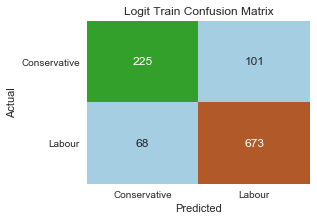

In [3684]:
#draw_cm(y_train_res,ytrain_predict,"Logit Train Confusion Matrix")
draw_cm(y_train,ytrain_predict,"Logit Train Confusion Matrix")

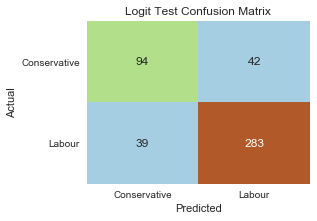

In [3685]:
draw_cm(y_test,ytest_predict,"Logit Test Confusion Matrix")

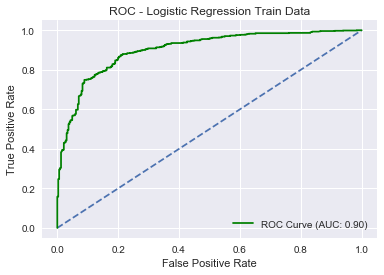

logit_train_auc 0.9016914632026031


In [3686]:
#logit_train_auc3, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model, X_train_res, y_train_res, 'g', 'ROC - Logistic Regression Train Data')
logit_train_auc3, logit_train_fpr, logit_train_tpr = draw_auc_roc(logit_model3, X_train, y_train, 'green', 'ROC - Logistic Regression Train Data')
print('logit_train_auc', logit_train_auc3)

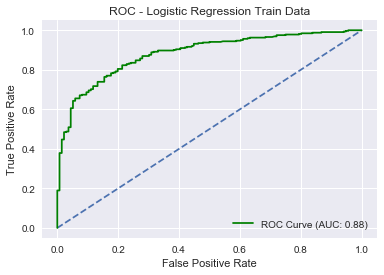

logit_test_auc 0.8817478078187797


In [3687]:
logit_test_auc3, logit_test_fpr, logit_test_tpr = draw_auc_roc(logit_model3, X_test, y_test, 'green', 'ROC - Logistic Regression Train Data')
print('logit_test_auc', logit_test_auc3)

In [3688]:
print('1st Iteration: logit_test_auc', logit_test_auc1)

1st Iteration: logit_test_auc 0.8888495615637558


Taking this iteration as Logit final model

## Linear Discriminant Analysis with GridsearchCV

In [3689]:
clf = LinearDiscriminantAnalysis()
grid_values = {'solver': ['svd', 'lsqr', 'eigen'],
               'tol': [0.0001, 0.001, 0.01]
              }
LDA_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 3)
LDA_model3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.0001, 0.001, 0.01]})

In [3690]:
LDA_model3.best_params_

{'solver': 'svd', 'tol': 0.0001}

In [3691]:
#ytrain_predict = LDA_model3.predict(X_train_res)
ytrain_predict = LDA_model3.predict(X_train)
ytest_predict = LDA_model3.predict(X_test)

In [3692]:
#LDA_met,LDA_train_accu,LDA_train_precision,LDA_train_recall,LDA_train_f1 = performance_matrices(LDA_model, X_train_res, y_train_res, ytrain_predict)
LDA_train_met3,LDA_train_accu3,LDA_train_precision3,LDA_train_recall3,LDA_train_f13 = performance_matrices(LDA_model3, X_train, y_train, ytrain_predict)
print ('LDA_train_accu ',LDA_train_accu3)
print ('LDA_train_precision ',LDA_train_precision3)
print ('LDA_train_recall ',LDA_train_recall3)
print ('LDA_train_f1 ',LDA_train_f13)

LDA_train_accu  0.85
LDA_train_precision  0.77
LDA_train_recall  0.72
LDA_train_f1  0.75


In [3693]:
LDA_train_met3

,precision,recall,f1-score,support
0,0.768730,0.723926,0.745656,326.00000
1,0.881579,0.904184,0.892738,741.00000
accuracy,0.849110,0.849110,0.849110,0.84911
macro avg,0.825154,0.814055,0.819197,1067.00000
weighted avg,0.847100,0.849110,0.847800,1067.00000


In [3694]:
LDA_train_met1

,precision,recall,f1-score,support
0,0.768730,0.723926,0.745656,326.00000
1,0.881579,0.904184,0.892738,741.00000
accuracy,0.849110,0.849110,0.849110,0.84911
macro avg,0.825154,0.814055,0.819197,1067.00000
weighted avg,0.847100,0.849110,0.847800,1067.00000


In [3695]:
LDA_test_met3,LDA_test_accu3,LDA_test_precision3,LDA_test_recall3,LDA_test_f13 = performance_matrices(LDA_model3, X_test, y_test, ytest_predict)
print ('LDA_test_accu ',LDA_test_accu3)
print ('LDA_test_precision ',LDA_test_precision3)
print ('LDA_test_recall ',LDA_test_recall3)
print ('LDA_test_f1 ',LDA_test_f13)

LDA_test_accu  0.82
LDA_test_precision  0.68
LDA_test_recall  0.71
LDA_test_f1  0.7


In [3696]:
LDA_test_met3

,precision,recall,f1-score,support
0,0.683099,0.713235,0.697842,136.000000
1,0.876582,0.860248,0.868339,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.779840,0.786742,0.783090,458.000000
weighted avg,0.819129,0.816594,0.817711,458.000000


In [3697]:
LDA_test_met1

,precision,recall,f1-score,support
0,0.683099,0.713235,0.697842,136.000000
1,0.876582,0.860248,0.868339,322.000000
accuracy,0.816594,0.816594,0.816594,0.816594
macro avg,0.779840,0.786742,0.783090,458.000000
weighted avg,0.819129,0.816594,0.817711,458.000000


Both models found to be same

## KNN Model with GridsearchCV

In [3935]:
clf = KNeighborsClassifier()
grid_values = {'n_neighbors': range(5,20),
               'weights' : ['uniform'],  #['uniform','distance'],
               'metric': ['minkowski', 'euclidean', 'canberra']
              }
KNN_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 5)
KNN_model3.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(5, 20), 'weights': ['uniform']})

In [3936]:
KNN_model3.best_params_

{'metric': 'minkowski', 'n_neighbors': 18, 'weights': 'uniform'}

In [3937]:
#ytrain_predict = KNN_model3.predict(X_train_res)
ytrain_predict = KNN_model3.predict(X_train)
ytest_predict = KNN_model3.predict(X_test)

In [3938]:
KNN_train_met3,KNN_train_accu3,KNN_train_precision3,KNN_train_recall3,KNN_train_f13 = performance_matrices(KNN_model3, X_train, y_train, ytrain_predict)
KNN_train_met_maj3,KNN_train_accu_maj3,KNN_train_precision_maj3,KNN_train_recall_maj3,KNN_train_f1_maj3 = performance_matrices_maj(KNN_model3, X_train, y_train, ytrain_predict)
print ('KNN_train_accu ',KNN_train_accu3) 
print ('KNN_train_precision ',KNN_train_precision3)
print ('KNN_train_recall ',KNN_train_recall3)
print ('KNN_train_f1 ',KNN_train_f13)

KNN_train_accu  0.83
KNN_train_precision  0.77
KNN_train_recall  0.65
KNN_train_f1  0.71


In [3939]:
KNN_train_met3

,precision,recall,f1-score,support
0,0.770909,0.650307,0.705491,326.000000
1,0.856061,0.914980,0.884540,741.000000
accuracy,0.834114,0.834114,0.834114,0.834114
macro avg,0.813485,0.782643,0.795015,1067.000000
weighted avg,0.830044,0.834114,0.829835,1067.000000


In [3940]:
KNN_train_met1

,precision,recall,f1-score,support
0,0.788779,0.733129,0.759936,326.000000
1,0.886126,0.913630,0.899668,741.000000
accuracy,0.858482,0.858482,0.858482,0.858482
macro avg,0.837452,0.823380,0.829802,1067.000000
weighted avg,0.856383,0.858482,0.856976,1067.000000


In [3941]:
KNN_test_met3,KNN_test_accu3,KNN_test_precision3,KNN_test_recall3,KNN_test_f13 = performance_matrices(KNN_model3, X_test, y_test, ytest_predict)
KNN_test_met_maj3,KNN_test_accu_maj3,KNN_test_precision_maj3,KNN_test_recall_maj3,KNN_test_f1_maj3 = performance_matrices_maj(KNN_model3, X_test, y_test, ytest_predict)
print ('KNN_test_accu ',KNN_test_accu3)
print ('KNN_test_precision ',KNN_test_precision3)
print ('KNN_test_recall ',KNN_test_recall3)
print ('KNN_test_f1 ',KNN_test_f13)

KNN_test_accu  0.82
KNN_test_precision  0.71
KNN_test_recall  0.66
KNN_test_f1  0.68


In [3942]:
KNN_test_met3

,precision,recall,f1-score,support
0,0.708661,0.661765,0.684411,136.000000
1,0.861027,0.885093,0.872894,322.000000
accuracy,0.818777,0.818777,0.818777,0.818777
macro avg,0.784844,0.773429,0.778652,458.000000
weighted avg,0.815783,0.818777,0.816925,458.000000


In [3943]:
KNN_test_met1

,precision,recall,f1-score,support
0,0.685484,0.625000,0.653846,136.000000
1,0.847305,0.878882,0.862805,322.000000
accuracy,0.803493,0.803493,0.803493,0.803493
macro avg,0.766395,0.751941,0.758326,458.000000
weighted avg,0.799254,0.803493,0.800756,458.000000


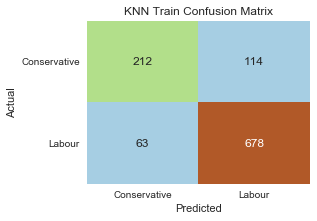

In [3944]:
draw_cm(y_train,ytrain_predict,"KNN Train Confusion Matrix")

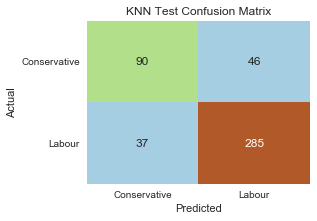

In [3945]:
draw_cm(y_test,ytest_predict,"KNN Test Confusion Matrix")

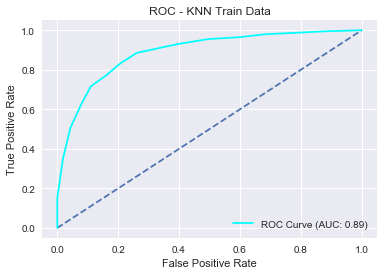

KNN_train_auc 0.8890779331528443


In [3946]:
KNN_train_auc3, KNN_train_fpr, KNN_train_tpr = draw_auc_roc(KNN_model3, X_train, y_train, 'cyan', 'ROC - KNN Train Data')
print('KNN_train_auc', KNN_train_auc3)

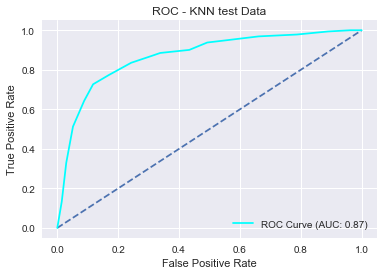

KNN_test_auc 0.868925831202046


In [3947]:
KNN_test_auc3, KNN_test_fpr, KNN_test_tpr = draw_auc_roc(KNN_model3, X_test, y_test, 'cyan', 'ROC - KNN test Data')
print('KNN_test_auc', KNN_test_auc3)

Found to be overfitting, and the recall rate of minority class dropped

## Multinomial Naive Bayes - No hyperparameters (except prior) to Gridsearch

## Support Vector Machine with GridsearchCV

In [3812]:
class_weight = dict({0:2.3, 1:1})
clf = svm.SVC(probability=True, class_weight = class_weight)
grid_values = {'C': np.logspace(-1,1,20),  
              'kernel': ['linear']#['linear', 'poly', 'rbf', 'sigmoid']
              } 
SVM_model3 = GridSearchCV(clf, param_grid = grid_values, cv = 3)
#SVM_model3 = svm.SVC(C = 0.20691380811147897, probability=True, class_weight = class_weight, kernel = 'rbf')
SVM_model3.fit(X_train, y_train) 

GridSearchCV(cv=3, estimator=SVC(class_weight={0: 2.3, 1: 1}, probability=True),
             param_grid={'C': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ]),
                         'kernel': ['linear']})

In [3813]:
SVM_model3.best_params_

{'C': 0.12742749857031338, 'kernel': 'linear'}

In [3814]:
#ytrain_predict = SVM_model3.predict(X_train_res)
ytrain_predict = SVM_model3.predict(X_train)
ytest_predict = SVM_model3.predict(X_test)

In [3815]:
#SVM_train_met3,SVM_train_accu,SVM_train_precision,SVM_train_recall,SVM_train_f1 = performance_matrices(SVM_model3, X_train_res, y_train_res, ytrain_predict)
SVM_train_met3,SVM_train_accu3,SVM_train_precision3,SVM_train_recall3,SVM_train_f13 = performance_matrices(SVM_model3, X_train, y_train, ytrain_predict)
SVM_train_met_maj3,SVM_train_accu_maj3,SVM_train_precision_maj3,SVM_train_recall_maj3,SVM_train_f1_maj3 = performance_matrices_maj(SVM_model3, X_train, y_train, ytrain_predict)
print ('SVM_train_accu ',SVM_train_accu3)
print ('SVM_train_precision ',SVM_train_precision3)
print ('SVM_train_recall ',SVM_train_recall3)
print ('SVM_train_f1 ',SVM_train_f13)

SVM_train_accu  0.83
SVM_train_precision  0.68
SVM_train_recall  0.84
SVM_train_f1  0.75


In [3816]:
SVM_train_met3

,precision,recall,f1-score,support
0,0.677340,0.843558,0.751366,326.000000
1,0.922844,0.823212,0.870185,741.000000
accuracy,0.829428,0.829428,0.829428,0.829428
macro avg,0.800092,0.833385,0.810776,1067.000000
weighted avg,0.847835,0.829428,0.833883,1067.000000


In [3817]:
SVM_train_met1

,precision,recall,f1-score,support
0,0.870748,0.785276,0.825806,326.000000
1,0.909444,0.948718,0.928666,741.000000
accuracy,0.898782,0.898782,0.898782,0.898782
macro avg,0.890096,0.866997,0.877236,1067.000000
weighted avg,0.897621,0.898782,0.897239,1067.000000


In [3818]:
SVM_test_met3,SVM_test_accu3,SVM_test_precision3,SVM_test_recall3,SVM_test_f13 = performance_matrices(SVM_model3, X_test, y_test, ytest_predict)
SVM_test_met_maj3,SVM_test_accu_maj3,SVM_test_precision_maj3,SVM_test_recall_maj3,SVM_test_f1_maj3 = performance_matrices_maj(SVM_model3, X_test, y_test, ytest_predict)
print ('SVM_test_accu ',SVM_test_accu3)
print ('SVM_test_precision ',SVM_test_precision3)
print ('SVM_test_recall ',SVM_test_recall3)
print ('SVM_test_f1 ',SVM_test_f13)

SVM_test_accu  0.8
SVM_test_precision  0.62
SVM_test_recall  0.85
SVM_test_f1  0.72


In [3819]:
SVM_test_met3

,precision,recall,f1-score,support
0,0.617021,0.852941,0.716049,136.000000
1,0.925926,0.776398,0.844595,322.000000
accuracy,0.799127,0.799127,0.799127,0.799127
macro avg,0.771474,0.814669,0.780322,458.000000
weighted avg,0.834199,0.799127,0.806424,458.000000


In [3820]:
SVM_test_met1

,precision,recall,f1-score,support
0,0.710938,0.669118,0.689394,136.000000
1,0.863636,0.885093,0.874233,322.000000
accuracy,0.820961,0.820961,0.820961,0.820961
macro avg,0.787287,0.777105,0.781814,458.000000
weighted avg,0.818293,0.820961,0.819346,458.000000


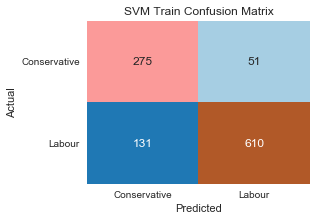

In [3821]:
draw_cm(y_train,ytrain_predict,"SVM Train Confusion Matrix")

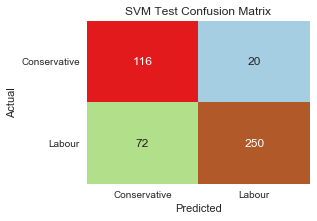

In [3822]:
draw_cm(y_test,ytest_predict,"SVM Test Confusion Matrix")

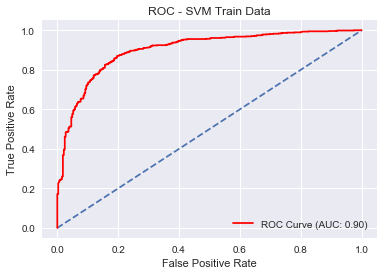

SVM_train_auc 0.9014555028439434


In [3823]:
SVM_train_auc3, SVM_train_fpr, SVM_train_tpr = draw_auc_roc(SVM_model3, X_train, y_train, 'red', 'ROC - SVM Train Data')
print('SVM_train_auc', SVM_train_auc3)

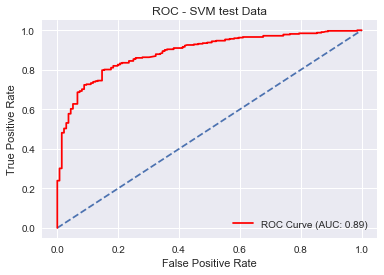

SVM_test_auc 0.8888495615637559


In [3824]:
SVM_test_auc3, SVM_test_fpr, SVM_test_tpr = draw_auc_roc(SVM_model3, X_test, y_test, 'red', 'ROC - SVM test Data')
print('SVM_test_auc', SVM_test_auc3)

In [3724]:
print('SVM_test_auc 1', SVM_test_auc1)

SVM_test_auc 1 0.878642217756668


Accepting this as final SVM Model as the recall for minority class is higher

## Bagging using RandomForest

In [3725]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
class_weight = dict({0:4, 1:1.5})
rfcl = RandomForestClassifier(class_weight=class_weight, 
                              min_samples_leaf=2,
                              min_samples_split=4)
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=50,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight={0: 4,
                                                                      1: 1.5},
                                                        min_samples_leaf=2,
                                                        min_samples_split=4),
                  n_estimators=50, random_state=1)

In [3726]:
#ytrain_predict = Bagging_model.predict(X_train_res)
ytrain_predict = Bagging_model.predict(X_train)
ytest_predict = Bagging_model.predict(X_test)

In [3727]:
#Bagging_met,Bagging_train_accu,Bagging_train_precision,Bagging_train_recall,Bagging_train_f1 = performance_matrices(Bagging_model, X_train_res, y_train_res, ytrain_predict)
Bagging_met,Bagging_train_accu,Bagging_train_precision,Bagging_train_recall,Bagging_train_f1 = performance_matrices(Bagging_model, X_train, y_train, ytrain_predict)
Bagging_met_maj,Bagging_train_accu_maj,Bagging_train_precision_maj,Bagging_train_recall_maj,Bagging_train_f1_maj = performance_matrices_maj(Bagging_model, X_train, y_train, ytrain_predict)
print ('Bagging_train_accu ',Bagging_train_accu)
print ('Bagging_train_precision ',Bagging_train_precision)
print ('Bagging_train_recall ',Bagging_train_recall)
print ('Bagging_train_f1 ',Bagging_train_f1)

Bagging_train_accu  0.89
Bagging_train_precision  0.8
Bagging_train_recall  0.86
Bagging_train_f1  0.83


In [3728]:
Bagging_met

,precision,recall,f1-score,support
0,0.797721,0.858896,0.827179,326.000000
1,0.935754,0.904184,0.919698,741.000000
accuracy,0.890347,0.890347,0.890347,0.890347
macro avg,0.866737,0.881540,0.873438,1067.000000
weighted avg,0.893581,0.890347,0.891431,1067.000000


In [3729]:
Bagging_met,Bagging_test_accu,Bagging_test_precision,Bagging_test_recall,Bagging_test_f1 = performance_matrices(Bagging_model, X_test, y_test, ytest_predict)
Bagging_met_maj,Bagging_test_accu_maj,Bagging_test_precision_maj,Bagging_test_recall_maj,Bagging_test_f1_maj = performance_matrices_maj(Bagging_model, X_test, y_test, ytest_predict)
print ('Bagging_test_accu ',Bagging_test_accu)
print ('Bagging_test_precision ',Bagging_test_precision)
print ('Bagging_test_recall ',Bagging_test_recall)
print ('Bagging_test_f1 ',Bagging_test_f1)

Bagging_test_accu  0.81
Bagging_test_precision  0.65
Bagging_test_recall  0.79
Bagging_test_f1  0.71


In [3730]:
Bagging_met

,precision,recall,f1-score,support
0,0.648485,0.786765,0.710963,136.000000
1,0.901024,0.819876,0.858537,322.000000
accuracy,0.810044,0.810044,0.810044,0.810044
macro avg,0.774754,0.803320,0.784750,458.000000
weighted avg,0.826034,0.810044,0.814716,458.000000


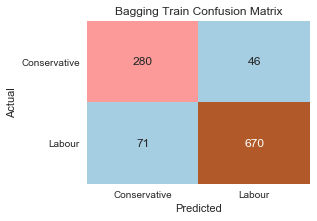

In [3731]:
draw_cm(y_train,ytrain_predict,"Bagging Train Confusion Matrix")
#draw_cm(y_train_res,ytrain_predict,"Bagging Train Confusion Matrix")

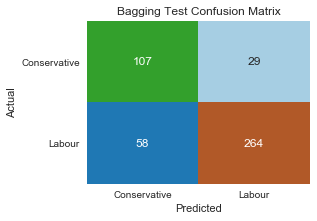

In [3732]:
draw_cm(y_test,ytest_predict,"Bagging Test Confusion Matrix")

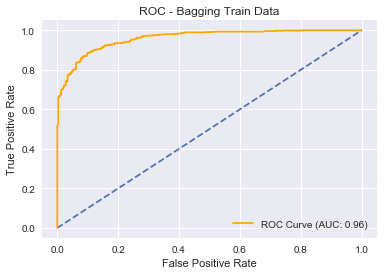

Bagging_train_auc 0.9597004545341646


In [3733]:
#Bagging_train_auc, Bagging_train_fpr, Bagging_train_tpr = draw_auc_roc(Bagging_model, X_train_res, y_train_res, 'k', 'ROC - Bagging Train Data')
Bagging_train_auc, Bagging_train_fpr, Bagging_train_tpr = draw_auc_roc(Bagging_model, X_train, y_train, 'orange', 'ROC - Bagging Train Data')
print('Bagging_train_auc', Bagging_train_auc)

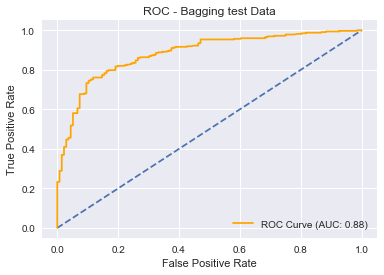

Bagging_test_auc 0.8826383814395323


In [3734]:
Bagging_test_auc, Bagging_test_fpr, Bagging_test_tpr = draw_auc_roc(Bagging_model, X_test, y_test, 'orange', 'ROC - Bagging test Data')
print('Bagging_test_auc', Bagging_test_auc)

## XGBoost

In [3735]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier(max_depth = 5,
                              min_child_weight = 3,
                              learning_rate =0.01,
                              n_estimators=1000)
XGB_model.fit(X_train, y_train)

XGBClassifier(learning_rate=0.01, max_depth=5, min_child_weight=3,
              n_estimators=1000)

In [3736]:
#ytrain_predict = XGB_model.predict(X_train_res)
ytrain_predict = XGB_model.predict(X_train)
ytest_predict = XGB_model.predict(X_test)

In [3737]:
#XGB_met,XGB_train_accu,XGB_train_precision,XGB_train_recall,XGB_train_f1 = performance_matrices(XGB_model, X_train_res, y_train_res, ytrain_predict)
XGB_met,XGB_train_accu,XGB_train_precision,XGB_train_recall,XGB_train_f1 = performance_matrices(XGB_model, X_train, y_train, ytrain_predict)
XGB_met_maj,XGB_train_accu_maj,XGB_train_precision_maj,XGB_train_recall_maj,XGB_train_f1_maj = performance_matrices_maj(XGB_model, X_train, y_train, ytrain_predict)
print ('XGB_train_accu ',XGB_train_accu)
print ('XGB_train_precision ',XGB_train_precision)
print ('XGB_train_recall ',XGB_train_recall)
print ('XGB_train_f1 ',XGB_train_f1)

XGB_train_accu  0.89
XGB_train_precision  0.85
XGB_train_recall  0.77
XGB_train_f1  0.81


In [3738]:
XGB_met

,precision,recall,f1-score,support
0,0.850847,0.769939,0.808374,326.000000
1,0.902850,0.940621,0.921348,741.000000
accuracy,0.888472,0.888472,0.888472,0.888472
macro avg,0.876849,0.855280,0.864861,1067.000000
weighted avg,0.886962,0.888472,0.886831,1067.000000


In [3739]:
XGB_met,XGB_test_accu,XGB_test_precision,XGB_test_recall,XGB_test_f1 = performance_matrices(XGB_model, X_test, y_test, ytest_predict)
XGB_met_maj,XGB_test_accu_maj,XGB_test_precision_maj,XGB_test_recall_maj,XGB_test_f1_maj = performance_matrices_maj(XGB_model, X_test, y_test, ytest_predict)
print ('XGB_test_accu ',XGB_test_accu)
print ('XGB_test_precision ',XGB_test_precision)
print ('XGB_test_recall ',XGB_test_recall)
print ('XGB_test_f1 ',XGB_test_f1)

XGB_test_accu  0.82
XGB_test_precision  0.7
XGB_test_recall  0.68
XGB_test_f1  0.69


In [3740]:
XGB_met

,precision,recall,f1-score,support
0,0.704545,0.683824,0.694030,136.000000
1,0.868098,0.878882,0.873457,322.000000
accuracy,0.820961,0.820961,0.820961,0.820961
macro avg,0.786322,0.781353,0.783743,458.000000
weighted avg,0.819532,0.820961,0.820177,458.000000


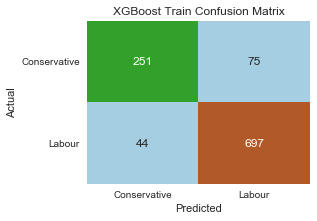

In [3741]:
draw_cm(y_train,ytrain_predict,"XGBoost Train Confusion Matrix")
#draw_cm(y_train_res,ytrain_predict,"XGBoost Train Confusion Matrix")

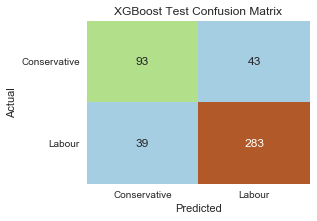

In [3742]:
draw_cm(y_test,ytest_predict,"XGBoost Test Confusion Matrix")

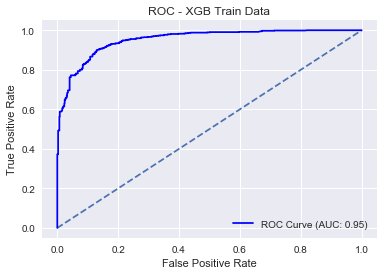

XGB_train_auc 0.9521627956531002


In [3743]:
XGB_train_auc, XGB_train_fpr, XGB_train_tpr = draw_auc_roc(XGB_model, X_train_res, y_train_res, 'blue', 'ROC - XGB Train Data')
#XGB_train_auc, XGB_train_fpr, XGB_train_tpr = draw_auc_roc(XGB_model, X_train, y_train, 'b', 'ROC - XGB Train Data')
print('XGB_train_auc', XGB_train_auc)

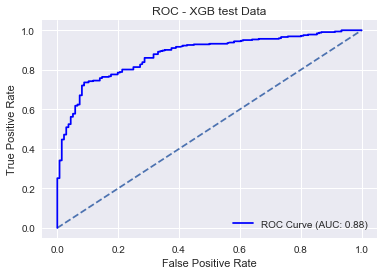

XGB_test_auc 0.877500456704421


In [3744]:
XGB_test_auc, XGB_test_fpr, XGB_test_tpr = draw_auc_roc(XGB_model, X_test, y_test, 'blue', 'ROC - XGB test Data')
print('XGB_test_auc', XGB_test_auc)

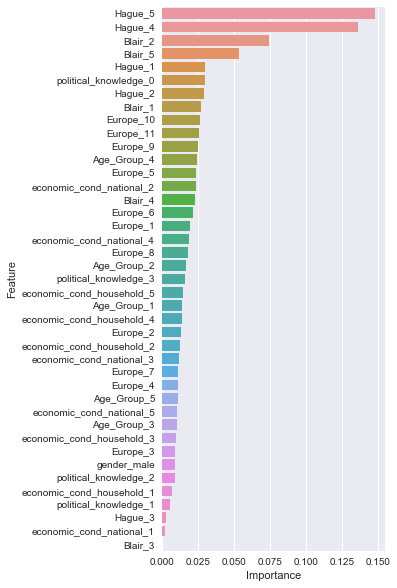

In [3745]:
feature_rank = pd.DataFrame({'Feature' : X_train.columns,'Importance' : XGB_model.feature_importances_ })
feature_rank = feature_rank.sort_values('Importance', ascending=False )
plt.figure(figsize=(4,10))
sns.barplot(y='Feature', x='Importance', data=feature_rank)

## Gradient Boosting Classifier

In [3746]:
from sklearn.ensemble import GradientBoostingClassifier
GBC_model = GradientBoostingClassifier(n_estimators = 500, max_depth = 10)
#GBC_model.fit(X_train_res, y_train_res)
GBC_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=500)

In [3747]:
#ytrain_predict = GBC_model.predict(X_train_res)
ytrain_predict = GBC_model.predict(X_train)
ytest_predict = GBC_model.predict(X_test)

In [3748]:
#GBC_met,GBC_train_accu,GBC_train_precision,GBC_train_recall,GBC_train_f1 = performance_matrices(GBC_model, X_train_res, y_train_res, ytrain_predict)
GBC_met,GBC_train_accu,GBC_train_precision,GBC_train_recall,GBC_train_f1 = performance_matrices(GBC_model, X_train, y_train, ytrain_predict)
print ('GBC_train_accu ',GBC_train_accu)
print ('GBC_train_precision ',GBC_train_precision)
print ('GBC_train_recall ',GBC_train_recall)
print ('GBC_train_f1 ',GBC_train_f1)

GBC_train_accu  0.99
GBC_train_precision  0.98
GBC_train_recall  0.98
GBC_train_f1  0.98


In [3749]:
GBC_met,GBC_test_accu,GBC_test_precision,GBC_test_recall,GBC_test_f1 = performance_matrices(GBC_model, X_test, y_test, ytest_predict)
print ('GBC_test_accu ',GBC_test_accu)
print ('GBC_test_precision ',GBC_test_precision)
print ('GBC_test_recall ',GBC_test_recall)
print ('GBC_test_f1 ',GBC_test_f1)

GBC_test_accu  0.77
GBC_test_precision  0.61
GBC_test_recall  0.58
GBC_test_f1  0.6


Found to be highly overfitting - hence dropping from final model selection

## Cross Validation of all final models

In [3750]:
from sklearn.model_selection import cross_val_score

Logistic Regression

In [3751]:
scores = cross_val_score(logit_model3, X_train, y_train, cv=10)
scores

array([0.8411215 , 0.8317757 , 0.81308411, 0.79439252, 0.87850467,
       0.85981308, 0.81308411, 0.83962264, 0.81132075, 0.83962264])

In [3752]:
logit_train_CVmean = scores.mean()
logit_train_CVstd = scores.std()
print("Logit Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Logit Train Accuracy: 0.83 (+/- 0.02)


In [3753]:
scores = cross_val_score(logit_model3, X_test, y_test, cv=10)
scores

array([0.86956522, 0.7826087 , 0.91304348, 0.80434783, 0.7826087 ,
       0.82608696, 0.7826087 , 0.80434783, 0.77777778, 0.75555556])

In [3754]:
logit_test_CVmean = scores.mean()
logit_test_CVstd = scores.std()
print("Logit Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Logit Test Accuracy: 0.81 (+/- 0.05)


LDA

In [3755]:
scores = cross_val_score(LDA_model, X_train_res, y_train_res, cv=10)
scores

array([0.5033557 , 0.4966443 , 0.5       , 0.5       , 0.72972973,
       0.91891892, 0.94594595, 0.89864865, 0.94594595, 0.90540541])

In [3756]:
LDA_train_CVmean = scores.mean()
LDA_train_CVstd = scores.std()
print("LDA Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

LDA Train Accuracy: 0.73 (+/- 0.20)


In [3757]:
scores = cross_val_score(LDA_model, X_test, y_test, cv=10)
scores

array([0.84782609, 0.76086957, 0.93478261, 0.76086957, 0.80434783,
       0.86956522, 0.80434783, 0.82608696, 0.77777778, 0.75555556])

In [3758]:
LDA_test_CVmean = scores.mean()
LDA_test_CVstd = scores.std()
print("LDA Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

LDA Test Accuracy: 0.81 (+/- 0.05)


KNN

In [3759]:
scores = cross_val_score(KNN_model3, X_train_res, y_train_res, cv=10)
scores

array([0.80536913, 0.81208054, 0.83783784, 0.7972973 , 0.85810811,
       0.87162162, 0.90540541, 0.89864865, 0.87162162, 0.87837838])

In [3760]:
KNN_train_CVmean = scores.mean()
KNN_train_CVstd = scores.std()
print("KNN Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Train Accuracy: 0.85 (+/- 0.04)


In [3761]:
scores = cross_val_score(KNN_model3, X_test, y_test, cv=10)
scores

array([0.82608696, 0.76086957, 0.86956522, 0.76086957, 0.7826087 ,
       0.84782609, 0.82608696, 0.7826087 , 0.75555556, 0.77777778])

In [3762]:
KNN_test_CVmean = scores.mean()
KNN_test_CVstd = scores.std()
print("KNN Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Test Accuracy: 0.80 (+/- 0.04)


MNB

In [3763]:
scores = cross_val_score(MNB_model, X_train, y_train, cv=10)
scores

array([0.8317757 , 0.86915888, 0.80373832, 0.79439252, 0.87850467,
       0.85046729, 0.80373832, 0.83962264, 0.82075472, 0.81132075])

In [3764]:
MNB_train_CVmean = scores.mean()
MNB_train_CVstd = scores.std()
print("MNB Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MNB Train Accuracy: 0.83 (+/- 0.03)


In [3765]:
scores = cross_val_score(MNB_model, X_test, y_test, cv=10)
scores

array([0.86956522, 0.80434783, 0.91304348, 0.76086957, 0.84782609,
       0.82608696, 0.76086957, 0.7826087 , 0.8       , 0.77777778])

In [3766]:
MNB_test_CVmean = scores.mean()
MNB_test_CVstd = scores.std()
print("MNB Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MNB Test Accuracy: 0.81 (+/- 0.05)


SVM

In [3825]:
scores = cross_val_score(SVM_model3, X_train, y_train, cv=10)
scores

array([0.8317757 , 0.81308411, 0.79439252, 0.80373832, 0.85046729,
       0.8317757 , 0.76635514, 0.82075472, 0.81132075, 0.77358491])

In [3826]:
SVM_train_CVmean = scores.mean()
SVM_train_CVstd = scores.std()
print("SVM Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

SVM Train Accuracy: 0.81 (+/- 0.02)


In [3827]:
scores = cross_val_score(SVM_model3, X_test, y_test, cv=10)
scores

array([0.86956522, 0.7826087 , 0.89130435, 0.76086957, 0.84782609,
       0.84782609, 0.76086957, 0.7826087 , 0.68888889, 0.77777778])

In [3828]:
SVM_test_CVmean = scores.mean()
SVM_test_CVstd = scores.std()
print("SVM Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

SVM Test Accuracy: 0.80 (+/- 0.06)


Bagging with RF

In [3771]:
scores = cross_val_score(Bagging_model, X_train_res, y_train_res, cv=10)
scores

array([0.83221477, 0.84563758, 0.83783784, 0.79054054, 0.86486486,
       0.87162162, 0.85810811, 0.88513514, 0.88513514, 0.88513514])

In [3772]:
Bagging_train_CVmean = scores.mean()
Bagging_train_CVstd = scores.std()
print("Bagging Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

Bagging Train Accuracy: 0.86 (+/- 0.03)


In [3773]:
scores = cross_val_score(Bagging_model, X_test, y_test, cv=10)
scores

array([0.82608696, 0.7826087 , 0.89130435, 0.7173913 , 0.80434783,
       0.84782609, 0.80434783, 0.7826087 , 0.77777778, 0.8       ])

In [3774]:
Bagging_test_CVmean = scores.mean()
Bagging_test_CVstd = scores.std() 
print("Bagging Test Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

Bagging Test Accuracy: 0.80 (+/- 0.04)


XGBoost

In [3775]:
scores = cross_val_score(XGB_model, X_train_res, y_train_res, cv=10)
scores

array([0.83221477, 0.80536913, 0.81756757, 0.81081081, 0.87837838,
       0.93918919, 0.88513514, 0.91216216, 0.89189189, 0.89864865])

In [3776]:
XGB_train_CVmean = scores.mean()
XGB_train_CVstd = scores.std() 
print("XGBoost Train Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

XGBoost Train Accuracy: 0.87 (+/- 0.04)


In [3777]:
scores = cross_val_score(XGB_model, X_test, y_test, cv=10)
scores

array([0.86956522, 0.76086957, 0.91304348, 0.76086957, 0.82608696,
       0.82608696, 0.84782609, 0.7826087 , 0.73333333, 0.77777778])

In [3778]:
XGB_test_CVmean = scores.mean()
XGB_test_CVstd = scores.std() 
print("XGBoost Test Accuracy: %0.2f (+/- %0.2f)" % (XGB_test_CVmean, XGB_test_CVstd))

XGBoost Test Accuracy: 0.81 (+/- 0.05)


## Final Model Comparison

In [3829]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']
train_perf_data = pd.DataFrame({'Logit Train':[logit_train_accu3,logit_train_auc3,logit_train_recall3,logit_train_recall_maj3,logit_train_precision3,logit_train_precision_maj3,logit_train_f13,logit_train_f1_maj3],
                     'LDA Train':[LDA_train_accu,LDA_train_auc1,LDA_train_recall,LDA_train_recall_maj,LDA_train_precision,LDA_train_precision_maj,LDA_train_f1,LDA_train_f1_maj],
                     'KNN Train':[KNN_train_accu3,KNN_train_auc3,KNN_train_recall3,KNN_train_recall_maj3,KNN_train_precision3,KNN_train_precision_maj3,KNN_train_f13,KNN_train_f1_maj3],
                     'MNB Train':[MNB_train_accu,MNB_train_auc1,MNB_train_recall,MNB_train_recall_maj,MNB_train_precision,MNB_train_precision_maj,MNB_train_f1,MNB_train_f1_maj],
                     'SVM Train':[SVM_train_accu3,SVM_train_auc3,SVM_train_recall3,SVM_train_recall_maj3,SVM_train_precision3,SVM_train_precision_maj3,SVM_train_f13,SVM_train_f1_maj3],
                     'Bagging Train':[Bagging_train_accu,Bagging_train_auc,Bagging_train_recall,Bagging_train_recall_maj,Bagging_train_precision,Bagging_train_precision_maj,Bagging_train_f1,Bagging_train_f1_maj],
                     'XGB Train':[XGB_train_accu,XGB_train_auc,XGB_train_recall,XGB_train_recall_maj,XGB_train_precision,XGB_train_precision_maj,XGB_train_f1,XGB_train_f1_maj],
                     },index=index)
round(train_perf_data,2)

,Logit Train,LDA Train,KNN Train,MNB Train,SVM Train,Bagging Train,XGB Train
Accuracy,0.84,0.85,0.83,0.84,0.83,0.89,0.89
AUC,0.90,0.90,0.89,0.89,0.90,0.96,0.95
Recall-0,0.69,0.72,0.65,0.73,0.84,0.86,0.77
Recall-1,0.91,0.90,0.91,0.89,0.82,0.90,0.94
Precision-0,0.77,0.77,0.77,0.74,0.68,0.80,0.85
Precision-1,0.87,0.88,0.86,0.88,0.92,0.94,0.90
F1 Score-0,0.73,0.75,0.71,0.73,0.75,0.83,0.81
F1 Score-1,0.89,0.89,0.88,0.88,0.87,0.92,0.92


In [3830]:
index=['Accuracy','AUC','Recall-0','Recall-1','Precision-0','Precision-1','F1 Score-0','F1 Score-1']
test_perf_data = pd.DataFrame({'Logit Test':[logit_test_accu3,logit_test_auc3,logit_test_recall3,logit_test_recall_maj3,logit_test_precision3,logit_test_precision_maj3,logit_test_f13,logit_test_f1_maj3],
                     'LDA Test':[LDA_test_accu,LDA_test_auc1,LDA_test_recall,LDA_test_recall_maj,LDA_test_precision,LDA_test_precision_maj,LDA_test_f1,LDA_test_f1_maj],
                     'KNN Test':[KNN_test_accu3,KNN_test_auc3,KNN_test_recall3,KNN_test_recall_maj3,KNN_test_precision3,KNN_test_precision_maj3,KNN_test_f13,KNN_test_f1_maj3],
                     'MNB Test':[MNB_test_accu,MNB_test_auc1,MNB_test_recall,MNB_test_recall_maj,MNB_test_precision,MNB_test_precision_maj,MNB_test_f1,MNB_test_f1_maj],
                     'SVM Test':[SVM_test_accu3,SVM_test_auc3,SVM_test_recall3,SVM_test_recall_maj3,SVM_test_precision3,SVM_test_precision_maj3,SVM_test_f13,SVM_test_f1_maj3],
                     'Bagging Test':[Bagging_test_accu,Bagging_test_auc,Bagging_test_recall,Bagging_test_recall_maj,Bagging_test_precision,Bagging_test_precision_maj,Bagging_test_f1,Bagging_test_f1_maj],
                     'XGB Test':[XGB_test_accu,XGB_test_auc,XGB_test_recall,XGB_test_recall_maj,XGB_test_precision,XGB_test_precision_maj,XGB_test_f1,XGB_test_f1_maj]
                    },index=index)
round(test_perf_data,2)

,Logit Test,LDA Test,KNN Test,MNB Test,SVM Test,Bagging Test,XGB Test
Accuracy,0.82,0.82,0.82,0.83,0.80,0.81,0.82
AUC,0.88,0.88,0.87,0.90,0.89,0.88,0.88
Recall-0,0.69,0.71,0.66,0.74,0.85,0.79,0.68
Recall-1,0.88,0.86,0.89,0.87,0.78,0.82,0.88
Precision-0,0.71,0.68,0.71,0.71,0.62,0.65,0.70
Precision-1,0.87,0.88,0.86,0.89,0.93,0.90,0.87
F1 Score-0,0.70,0.70,0.68,0.72,0.72,0.71,0.69
F1 Score-1,0.87,0.87,0.87,0.88,0.84,0.86,0.87


In [3831]:
index=['CV Mean Accuracy','CV Std Deviation']
CV_data = pd.DataFrame({'Logit Train':[logit_train_CVmean,logit_train_CVstd],
                     'Logit Test':[logit_test_CVmean,logit_test_CVstd],
                     'LDA Train':[LDA_train_CVmean,LDA_train_CVstd],
                     'LDA Test':[LDA_test_CVmean,LDA_test_CVstd],
                     'KNN Train':[KNN_train_CVmean,KNN_train_CVstd],
                     'KNN Test':[KNN_test_CVmean,KNN_test_CVstd],
                     'MNB Train':[MNB_train_CVmean,MNB_train_CVstd],
                     'MNB Test':[MNB_test_CVmean,MNB_test_CVstd],
                     'SVM Train':[SVM_train_CVmean,SVM_train_CVstd],
                     'SVM Test':[SVM_test_CVmean,SVM_test_CVstd],
                     'Bagging Train':[Bagging_train_CVmean,Bagging_train_CVstd],
                     'Bagging Test':[Bagging_test_CVmean,Bagging_test_CVstd],
                     'XGB Train':[XGB_train_CVmean,XGB_train_CVstd],
                     'XGB Test':[XGB_test_CVmean,XGB_test_CVstd]
                    },index=index)
round(CV_data,2)

,Logit Train,Logit Test,LDA Train,LDA Test,KNN Train,KNN Test,MNB Train,MNB Test,SVM Train,SVM Test,Bagging Train,Bagging Test,XGB Train,XGB Test
CV Mean Accuracy,0.83,0.81,0.73,0.81,0.85,0.80,0.83,0.81,0.81,0.80,0.86,0.80,0.87,0.81
CV Std Deviation,0.02,0.05,0.20,0.05,0.04,0.04,0.03,0.05,0.02,0.06,0.03,0.04,0.04,0.05


Text(0.5, 1, 'Model Performance in Train Datasets')

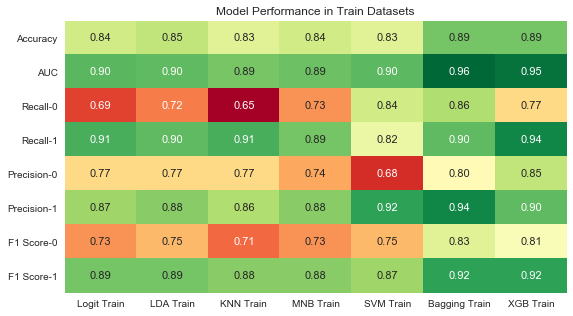

In [3832]:
plt.subplots(figsize=(9,5))
ax = sns.heatmap(train_perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":11}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.title('Model Performance in Train Datasets')

Text(0.5, 1, 'Model Performance in Test Datasets')

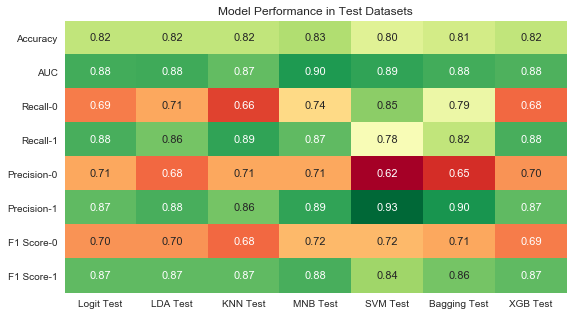

In [3833]:
plt.subplots(figsize=(9,5))
ax = sns.heatmap(test_perf_data, cmap='RdYlGn', annot=True, fmt='.2f',annot_kws={"fontsize":11}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0) 
plt.title('Model Performance in Test Datasets')

Text(0.5, 1, 'Cross Validation Scores - Train & Test')

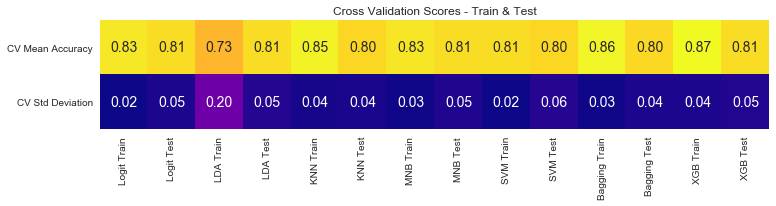

In [3834]:
plt.subplots(figsize=(12,2))
ax = sns.heatmap(CV_data, cmap='plasma', annot=True, fmt='.2f',annot_kws={"fontsize":14}, cbar = False)
bottom, top = ax.get_ylim()
ax.set_ylim (bottom + 0.5, top - 0.5)
plt.yticks(rotation=0)
plt.title('Cross Validation Scores - Train & Test')

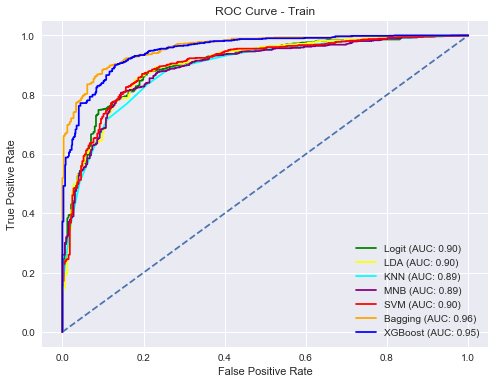

In [3835]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_train_fpr, logit_train_tpr,color='green',label='Logit (AUC: %0.2f)'%logit_train_auc3)
plt.plot(LDA_train_fpr,LDA_train_tpr,color='yellow',label='LDA (AUC: %0.2f)'%LDA_train_auc1)
plt.plot(KNN_train_fpr,KNN_train_tpr,color='cyan',label='KNN (AUC: %0.2f)'%KNN_train_auc3)
plt.plot(MNB_train_fpr,MNB_train_tpr,color='purple',label='MNB (AUC: %0.2f)'%MNB_train_auc1)
plt.plot(SVM_train_fpr,SVM_train_tpr,color='red',label='SVM (AUC: %0.2f)'%SVM_train_auc3)
plt.plot(Bagging_train_fpr,Bagging_train_tpr,color='orange',label='Bagging (AUC: %0.2f)'%Bagging_train_auc)
plt.plot(XGB_train_fpr,XGB_train_tpr,color='blue',label='XGBoost (AUC: %0.2f)'%XGB_train_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train')
plt.legend(loc="lower right")

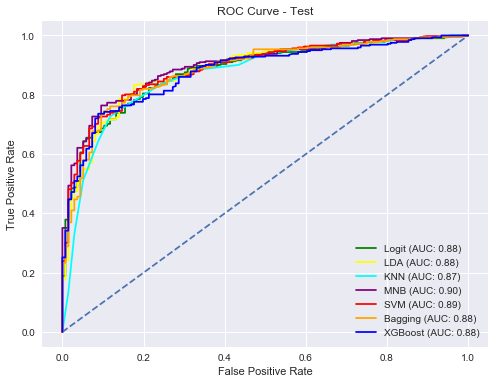

In [3948]:
plt.figure(figsize=(8,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logit_test_fpr, logit_test_tpr,color='green',label='Logit (AUC: %0.2f)'%logit_test_auc3)
plt.plot(LDA_test_fpr,LDA_test_tpr,color='yellow',label='LDA (AUC: %0.2f)'%LDA_test_auc1)
plt.plot(KNN_test_fpr,KNN_test_tpr,color='cyan',label='KNN (AUC: %0.2f)'%KNN_test_auc3)
plt.plot(MNB_test_fpr,MNB_test_tpr,color='purple',label='MNB (AUC: %0.2f)'%MNB_test_auc1)
plt.plot(SVM_test_fpr,SVM_test_tpr,color='red',label='SVM (AUC: %0.2f)'%SVM_test_auc3)
plt.plot(Bagging_test_fpr,Bagging_test_tpr,color='orange',label='Bagging (AUC: %0.2f)'%Bagging_test_auc)
plt.plot(XGB_test_fpr,XGB_test_tpr,color='blue',label='XGBoost (AUC: %0.2f)'%XGB_test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Test')
plt.legend(loc="lower right")